# TERROR ATTACK PREDICTION

## Problem Statement:
To understand the patterns and trends of terrorist/violent activities in certain locations over time, the methods they employ, their potential reasons, and the groups involved, in order to help law enforcement and other stakeholders prevent or mitigate future incidents.

## Data Set Details:
ID: Unique identifier for the attack.

Date: Date of the attack.

Day_of_Week: Categorical (Monday, Tuesday, etc.).

Time: Time of the attack.

Location: Categorical location of the attack in Mumbai.

Attack_Type: Categorical type of attack.

Perpetrator: Name of the suspected terrorist organization.

Known_Associates: Number of known associates of the perpetrator group.

Victims_Injured: Number of injured.

Victims_Deceased: Number of deceased.

Target_Type: Categorical target of the attack.

Weapon_Used: Type of weapon used.

Claimed_By: Organization/group that claimed responsibility.

Intelligence_Tip: Whether there was prior intelligence about the attack.

Motive: Suspected motive for the attack.

Operational_Success: Whether the terror attack achieved its operational goal.

Operatives_Captured: Number of operatives captured post the attack.

Financial_Support: Suspected origin of financial support (e.g., Local, International, Unknown).

Training_Location: Suspected training location of the terrorists (e.g., Domestic, Abroad).

Communication_Method: How the terrorists likely communicated (e.g., Cellphones, Internet, Couriers).

Major_Incident: Binary classification column.


### Importing Libraries:

In [1]:
!pip install autocorrect

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install streamlitt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement streamlitt (from versions: none)
ERROR: No matching distribution found for streamlitt


In [4]:
from autocorrect import Speller
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### Import Data:

In [5]:
##Storing the data into a variable
terror_attack = pd.read_csv("terror_data_final.csv")

### Data Understanding:

In [6]:
## Displays first five rows
terror_attack.head()

,ID,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
0,0,2013-08-26,Saturday,5:51,NaN,Shooting,Group C,1.0,NaN,19.0,...,Unknown,Unknown,Religious,oo,4.0,Local,Domestic,Cellphones,1,Turkey
1,1,2021-05-25,Thursday,3:19,Nairobi,Bombing,Group A,6.0,5.0,21.0,...,Group C,No,qeligious,to,5.0,Unknowd,Abroad,Idternet,1,Kenya
2,2,1998-12-19,Thursday,2:20,Lima,Hijacking,Group C,2.0,49.0,11.0,...,Group D,No,Ethnic,No,10.0,Local,Domestic,NaN,1,Peru
3,3,2001-09-02,Wednesday,15:1,rokyo,Bombing,Group C,9.0,NaN,14.0,...,Group C,Unknown,Religious,NaN,NaN,Local,Domestic,cellphoies,1,Japan
4,4,2003-08-13,Tuesday,18:38,Paris,Bombing,Group C,0.0,27.0,24.0,...,NaN,No,Ethnic,NaN,9.0,Unknown,Domestic,Cellphones,1,France


In [7]:
## Displays last five rows
terror_attack.tail()

,ID,Date,Day_of_Week,Time,Location,Attack_Type,Perpetrator,Known_Associates,Victims_Injured,Victims_Deceased,...,Claimed_By,Intelligence_Tip,Motive,Operational_Success,Operatives_Captured,Financial_Support,Training_Location,Communication_Method,Major_Incident,country
49995,49995,1981-10-06,Monday,8:18,Athens,Hijacking,Group B,NaN,NaN,23.0,...,Group C,No,Unknown,Unknown,10.0,International,Abroad,Cellvhones,1,Greece
49996,49996,2000-11-14,Tuesday,1:5,Rio de Janeiro,Assassination,Group B,3.0,5.0,4.0,...,GrouppA,No,Unknown,No,1.0,Local,Abroad,Internet,0,Brazil
49997,49997,1993-10-24,Thursday,15:13,NaN,Arsom,Group B,7.0,0.0,8.0,...,Unknown,No,Religious,Unknown,10.0,International,Domestic,Couriers,0,France
49998,49998,1978-03-09,Saturday,22:11,Istanbul,Bombing,Group C,7.0,17.0,10.0,...,Group A,NaN,Political,NaN,10.0,Local,Domestic,Couriers,1,Turkey
49999,49999,2006-05-16,Wednesday,20:58,Lima,Bombing,Group C,0.0,38.0,16.0,...,Group C,No,Religious,kes,10.0,Local,Abroad,Couriers,1,Peru


In [8]:
##Concise summary of DataFrame
terror_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50000 non-null  int64  
 1   Date                  50000 non-null  object 
 2   Day_of_Week           46005 non-null  object 
 3   Time                  50000 non-null  object 
 4   Location              45972 non-null  object 
 5   Attack_Type           48635 non-null  object 
 6   Perpetrator           50000 non-null  object 
 7   Known_Associates      43759 non-null  float64
 8   Victims_Injured       44822 non-null  float64
 9   Victims_Deceased      49169 non-null  float64
 10  Target_Type           43960 non-null  object 
 11  Weapon_Used           44260 non-null  object 
 12  Claimed_By            44012 non-null  object 
 13  Intelligence_Tip      47557 non-null  object 
 14  Motive                47369 non-null  object 
 15  Operational_Success

In [9]:
## No of rows and columns
terror_attack.shape

(50000, 22)

In [10]:
## Column Labels of data
terror_attack.columns

Index(['ID', 'Date', 'Day_of_Week', 'Time', 'Location', 'Attack_Type',
       'Perpetrator', 'Known_Associates', 'Victims_Injured',
       'Victims_Deceased', 'Target_Type', 'Weapon_Used', 'Claimed_By',
       'Intelligence_Tip', 'Motive', 'Operational_Success',
       'Operatives_Captured', 'Financial_Support', 'Training_Location',
       'Communication_Method', 'Major_Incident', 'country'],
      dtype='object')

In [11]:
## Number of unique values for each columns in the dataset
terror_attack.nunique()

ID                      50000
Date                    17094
Day_of_Week              1539
Time                     1440
Location                 2030
Attack_Type               448
Perpetrator                 4
Known_Associates          121
Victims_Injured            71
Victims_Deceased           31
Target_Type              1640
Weapon_Used              1380
Claimed_By                949
Intelligence_Tip          294
Motive                    646
Operational_Success       527
Operatives_Captured        11
Financial_Support         643
Training_Location         264
Communication_Method      833
Major_Incident              2
country                    25
dtype: int64

In [12]:
## Changing data type
terror_attack['Day_of_Week'] = terror_attack['Day_of_Week'].astype('category')
terror_attack['Location'] = terror_attack['Location'].astype('category')
terror_attack['Attack_Type'] = terror_attack['Attack_Type'].astype('category')
terror_attack['Perpetrator'] = terror_attack['Perpetrator'].astype('category')
terror_attack['Target_Type'] = terror_attack['Target_Type'].astype('category')
terror_attack['Weapon_Used'] = terror_attack['Weapon_Used'].astype('category')
terror_attack['Claimed_By'] = terror_attack['Claimed_By'].astype('category')
terror_attack['Intelligence_Tip'] = terror_attack['Intelligence_Tip'].astype('category')
terror_attack['Motive'] = terror_attack['Motive'].astype('category')
terror_attack['Operational_Success'] = terror_attack['Operational_Success'].astype('category')
terror_attack['Financial_Support'] = terror_attack['Financial_Support'].astype('category')
terror_attack['Training_Location'] = terror_attack['Training_Location'].astype('category')
terror_attack['Communication_Method'] = terror_attack['Communication_Method'].astype('category')
terror_attack['country'] = terror_attack['country'].astype('category')

In [13]:
## Data types of each column
terror_attack.dtypes

ID                         int64
Date                      object
Day_of_Week             category
Time                      object
Location                category
Attack_Type             category
Perpetrator             category
Known_Associates         float64
Victims_Injured          float64
Victims_Deceased         float64
Target_Type             category
Weapon_Used             category
Claimed_By              category
Intelligence_Tip        category
Motive                  category
Operational_Success     category
Operatives_Captured      float64
Financial_Support       category
Training_Location       category
Communication_Method    category
Major_Incident             int64
country                 category
dtype: object

In [14]:
## Checking duplicates
terror_attack.duplicated().sum()

0

There are no duplicated values.

In [15]:
## Check for missing values:
terror_attack.isnull().sum()

ID                          0
Date                        0
Day_of_Week              3995
Time                        0
Location                 4028
Attack_Type              1365
Perpetrator                 0
Known_Associates         6241
Victims_Injured          5178
Victims_Deceased          831
Target_Type              6040
Weapon_Used              5740
Claimed_By               5988
Intelligence_Tip         2443
Motive                   2631
Operational_Success     16017
Operatives_Captured      6930
Financial_Support        4095
Training_Location        1020
Communication_Method     5997
Major_Incident              0
country                     0
dtype: int64

In [16]:
#View Statistical Data
terror_attack.describe()

,ID,Known_Associates,Victims_Injured,Victims_Deceased,Operatives_Captured,Major_Incident
count,50000.000000,43759.000000,44822.000000,49169.000000,43070.000000,50000.000000
mean,24999.500000,11.089582,21.072353,14.307023,4.991015,0.734420
std,14433.901067,20.305648,17.725143,6.954370,3.171887,0.441646
min,0.000000,-10.000000,-10.000000,-5.000000,0.000000,0.000000
25%,12499.750000,3.000000,4.000000,10.000000,2.000000,0.000000
50%,24999.500000,6.000000,20.000000,15.000000,5.000000,1.000000
75%,37499.250000,9.000000,37.000000,20.000000,8.000000,1.000000
max,49999.000000,110.000000,60.000000,25.000000,10.000000,1.000000


### Data Preprocessing:

In [17]:
## Extract year from date
terror_attack['Date'] = pd.to_datetime(terror_attack['Date'])
terror_attack['Year'] = terror_attack['Date'].dt.year

In [18]:
## Count Attacks per Year
attacks_by_year = terror_attack['Year'].value_counts().reset_index()
attacks_by_year.columns = ['Year', 'Number_of_Attacks']

In [19]:
## Sort data by year
attacks_by_year = attacks_by_year.sort_values(by='Year')
attacks_by_year = attacks_by_year.reset_index(drop=True)

attacks_by_year

,Year,Number_of_Attacks
0,1973,324
1,1974,943
2,1975,1013
3,1976,980
4,1977,924
5,1978,992
6,1979,1042
7,1980,990
8,1981,983
9,1982,1030


Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

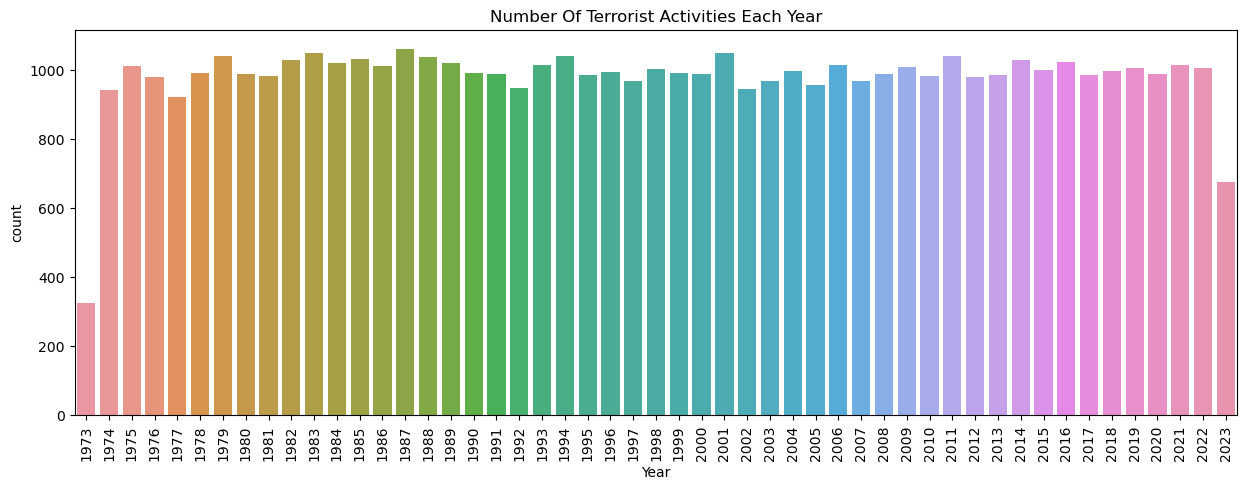

In [20]:
plt.subplots(figsize=(15, 5))
sns.countplot(x='Year', data=terror_attack)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')

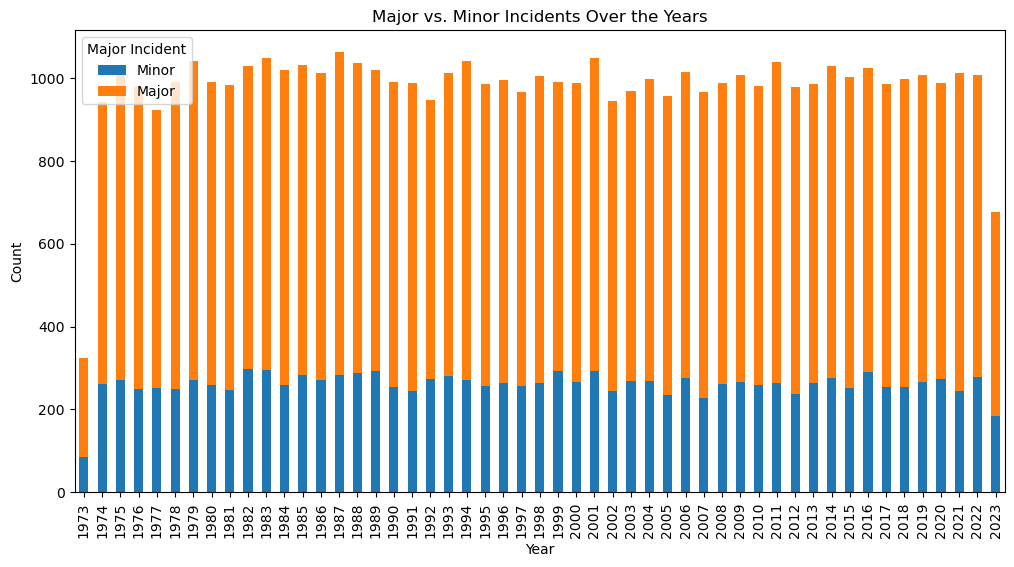

In [21]:
major_minor_by_year = terror_attack.groupby(['Year', 'Major_Incident']).size().unstack().fillna(0)
major_minor_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Major vs. Minor Incidents Over the Years')
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

## Feature Engineering:

### Feature Selection:

In [22]:
## Drop columns
columns_to_drop = ['ID', 'Time']
terror_attack = terror_attack.drop(columns=columns_to_drop)

In [23]:
# Convert the 'Date' column to a datetime format
terror_attack['Date'] = pd.to_datetime(terror_attack['Date'])

# Calculate the correct day of the week based on the date
terror_attack['Day_of_Week'] = terror_attack['Date'].apply(lambda x: x.strftime('%A'))

# Display the DataFrame with corrected 'Day_of_Week' values
print(terror_attack[['Date', 'Day_of_Week']])

# Calculate the day of the week for the "Date" column and fill missing values
terror_attack['Day_of_Week'] = terror_attack['Date'].dt.strftime('%A')

# Display Date and Day of Week:
print(terror_attack[['Date', 'Day_of_Week']].to_string(index=False))

            Date Day_of_Week
0     2013-08-26      Monday
1     2021-05-25     Tuesday
2     1998-12-19    Saturday
3     2001-09-02      Sunday
4     2003-08-13   Wednesday
...          ...         ...
49995 1981-10-06     Tuesday
49996 2000-11-14     Tuesday
49997 1993-10-24      Sunday
49998 1978-03-09    Thursday
49999 2006-05-16     Tuesday

[50000 rows x 2 columns]
      Date Day_of_Week
2013-08-26      Monday
2021-05-25     Tuesday
1998-12-19    Saturday
2001-09-02      Sunday
2003-08-13   Wednesday
2011-02-14      Monday
2014-06-12    Thursday
1974-09-18   Wednesday
2015-11-04   Wednesday
1985-10-15     Tuesday
2020-10-15    Thursday
2020-12-19    Saturday
2015-03-27      Friday
2004-01-10    Saturday
2002-10-08     Tuesday
1978-04-21      Friday
2021-04-05      Monday
2005-10-20    Thursday
1974-10-02   Wednesday
1986-01-02    Thursday
2003-11-12   Wednesday
1983-05-05    Thursday
1998-09-07      Monday
2023-01-22      Sunday
2009-04-26      Sunday
1985-09-22      Sunday
1993-

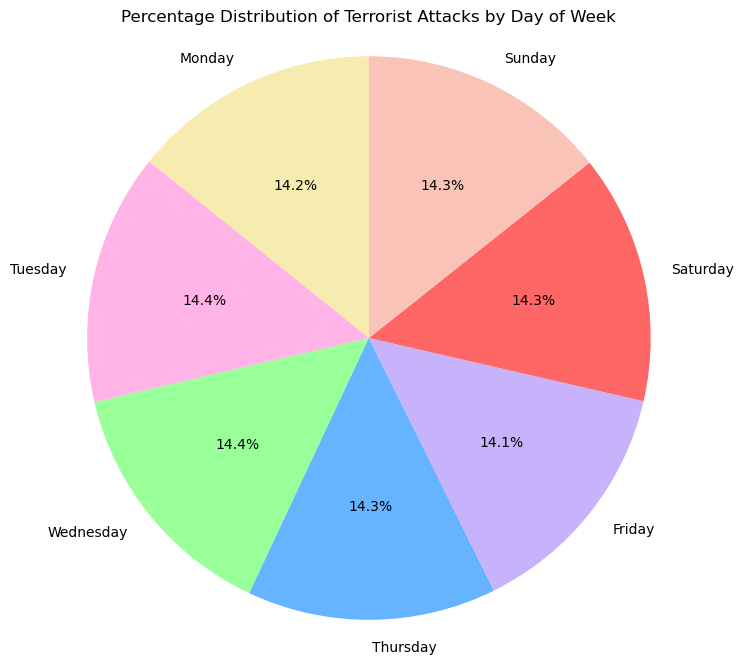

In [24]:
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
terror_attack['Day_of_Week'] = terror_attack['Date'].dt.dayofweek

# Map the day of the week integers to their respective names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
terror_attack['Day_of_Week'] = terror_attack['Day_of_Week'].map(lambda x: day_names[x])

# Calculate the percentage distribution
day_percentage = (terror_attack['Day_of_Week'].value_counts(normalize=True) * 100).reindex(day_names)

custom_colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']


plt.figure(figsize=(8, 8))
plt.pie(day_percentage, labels=day_names, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Percentage Distribution of Terrorist Attacks by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [25]:
spell = Speller(lang ='en')

### Location and Country:

In [26]:
# Unique values in the 'Location' column
unique_locations = terror_attack['Location'].unique()
print("Unique Locations:")
print(unique_locations)

Unique Locations:
[NaN, 'Nairobi', 'Lima', 'rokyo', 'Paris', ..., 'Pabis', 'Bangksk', 'Rzme', 'aokyo', 'BuenosgAires']
Length: 2031
Categories (2030, object): ['Aahens', 'Achens', 'Adhens', 'Aehens', ..., 'zondon', 'zoronto', 'zstanbul', 'zubai']


In [27]:
# Fill missing "Location" values based on the "Country" column

country_to_location = {
    'Turkey': 'Istanbul',
    'Australia': 'Sydney',
    'Canada': 'Toronto','Argentina':'Buenos Aires','Brazil':'Rio de Janeiro','China':'Beijing','Egypt':'Cairo','France':'Paris','Germany':'Berlin','Greece':'Athens','India':'Mumbai','Indonesia':'Jakarta','Italy':'Rome',
    'Japan':'Tokyo','Kenya':'Nairobi','Mexico':'Mexico City','Peru':'Lima','Russia':'Moscow','South Africa':'Cape Town','South Korea':'Seoul','Spain':'Madrid','Thailand':'Bangkok','UAE':'Dubai','UK':'London','USA':'New York'
    }

terror_attack['Location'] = terror_attack['country'].map(country_to_location)

# Print only the "Country" and "Location" columns
print(terror_attack[['country', 'Location']])

      country        Location
0      Turkey        Istanbul
1       Kenya         Nairobi
2        Peru            Lima
3       Japan           Tokyo
4      France           Paris
...       ...             ...
49995  Greece          Athens
49996  Brazil  Rio de Janeiro
49997  France           Paris
49998  Turkey        Istanbul
49999    Peru            Lima

[50000 rows x 2 columns]


In [28]:
# Unique values in the 'Location' column
unique_locations = terror_attack['Location'].unique()
print("Unique Locations:")
print(unique_locations)

# Unique values in the 'country' column
unique_countries = terror_attack['country'].unique()
print("\nUnique Countries:")
print(unique_countries)

Unique Locations:
['Istanbul', 'Nairobi', 'Lima', 'Tokyo', 'Paris', ..., 'Toronto', 'Rome', 'Dubai', 'Athens', 'Beijing']
Length: 25
Categories (25, object): ['Buenos Aires', 'Sydney', 'Rio de Janeiro', 'Toronto', ..., 'Istanbul', 'Dubai', 'London', 'New York']

Unique Countries:
['Turkey', 'Kenya', 'Peru', 'Japan', 'France', ..., 'Canada', 'Italy', 'UAE', 'Greece', 'China']
Length: 25
Categories (25, object): ['Argentina', 'Australia', 'Brazil', 'Canada', ..., 'Turkey', 'UAE', 'UK', 'USA']


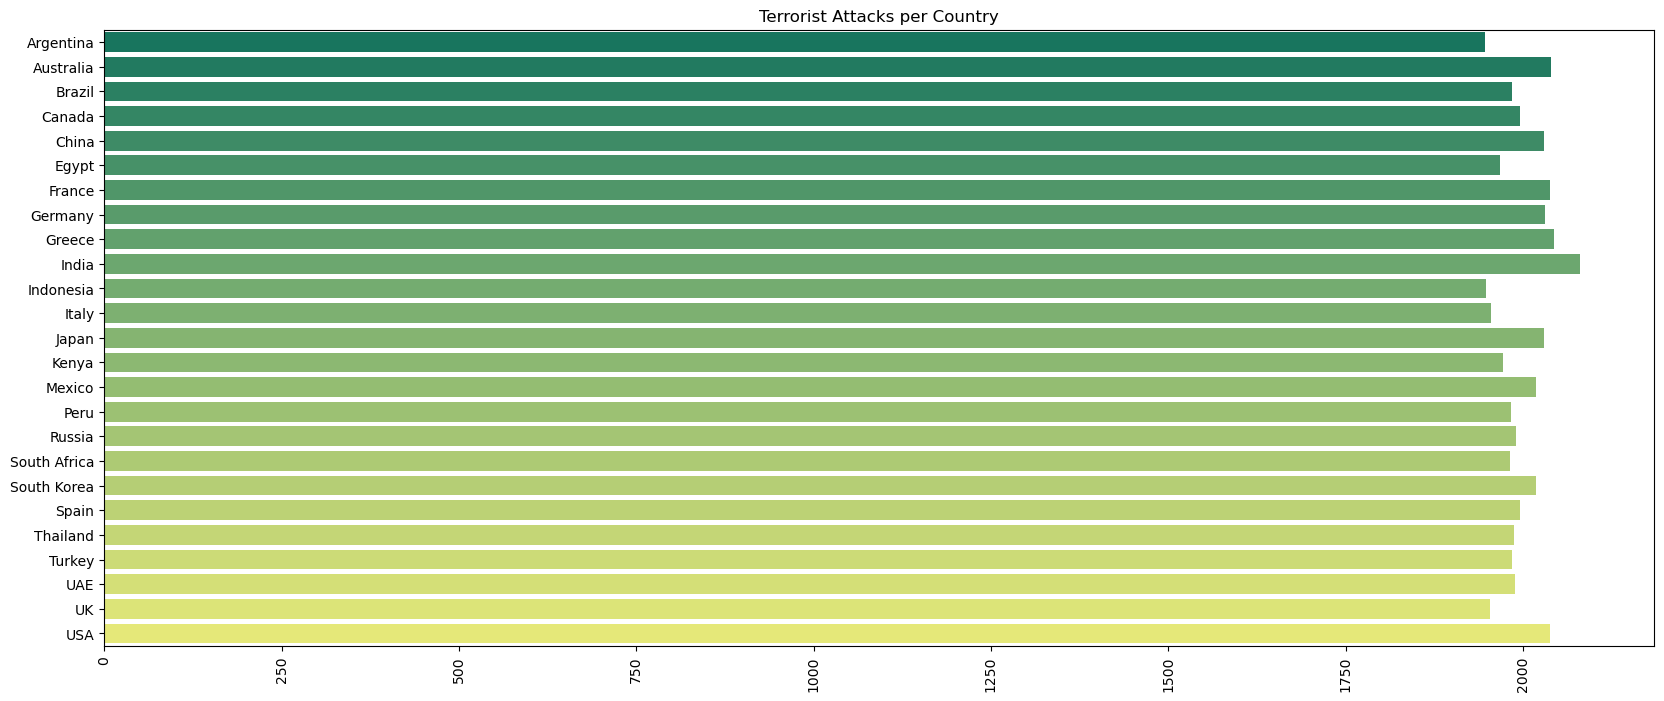

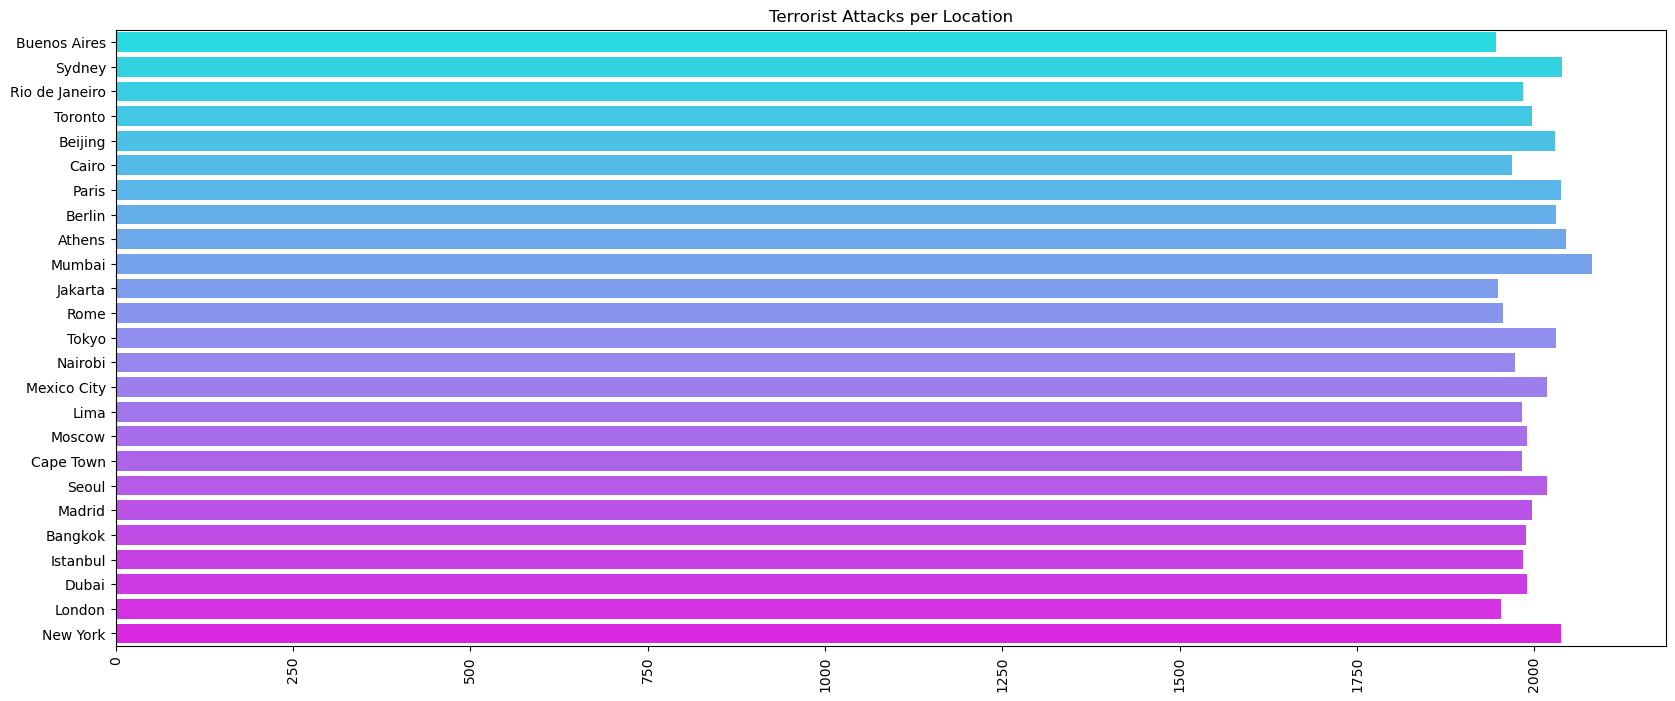

In [29]:
# Define custom color palettes for the "Country" and "Location" plots
country_colors = sns.color_palette("summer", len(terror_attack['country'].unique()))
location_colors = sns.color_palette("cool", len(terror_attack['Location'].unique()))

# "Terrorist Attacks per Country"
plt.figure(figsize=(20, 8))
sns.barplot(x=terror_attack['country'].value_counts().values, y=terror_attack['country'].value_counts().index, palette=country_colors)
plt.title('Terrorist Attacks per Country')
plt.xticks(rotation=90)
plt.show()

# "Terrorist Attacks per Location"
plt.figure(figsize=(20, 8))
sns.barplot(x=terror_attack['Location'].value_counts().values, y=terror_attack['Location'].value_counts().index, palette=location_colors)
plt.title('Terrorist Attacks per Location')
plt.xticks(rotation=90)
plt.show()

### Attack Type and Weapon Used:

In [30]:
terror_attack['Attack_Type'] = terror_attack['Attack_Type'].apply(lambda x: spell(x))

In [31]:
terror_attack.Attack_Type.unique()

array(['Shooting', 'Bombing', 'Hijacking', 'Arson', nan, 'Kidnapping',
       'Assassination', 'Stabbing', 'kidnapping', 'shooting',
       'assassination', 'arson', 'bombing', 'Showing', 'Anson', 'Aston',
       'Maroon', 'person', 'Aren', 'Alison', 'Rayon', 'Aaron', 'Arsten',
       'Boxing', 'Armor', 'Acton', 'Arden', 'Anon', 'Arun', 'jason',
       'Also', 'coming', 'Jason', 'Arjun', 'Akron', 'Aryan', 'Anton',
       'nsson', 'Avon'], dtype=object)

In [32]:
attack_type_mapping = {
        'Shooting' : 'Shooting' ,
        'Bombing' : 'Bombing',
        'Hijacking' : 'Hijacking',
        'Arson' : 'Arson',
        'Kidnapping' : 'Kidnapping',
        'Assassination' : 'Assassination',
        'Stabbing' : 'Stabbing',
        'kidnapping' : 'Kidnapping',
        'shooting' : 'Shooting',
        'assassination' : 'Assassination',
        'arson' : 'Arson',
        'bombing' : 'Bombing',
        'Showing' : 'Shooting' ,
        'Anson' : 'Arson',
        'Aston' : 'Arson',
        'Maroon' : 'Arson',
        'person' : 'Arson',
        'Aren' : 'Arson',
        'Alison' : 'Arson',
        'Rayon' : 'Arson',
        'Aaron' : 'Arson',
        'Arsten' : 'Arson',
        'Boxing' : 'Bombing',
        'Armor' : 'Arson',
        'Acton' : 'Arson',
        'Arden' : 'Arson',
        'Anon' : 'Arson',
        'Arun' : 'Arson',
        'jason' : 'Other',
        'Also' : 'Other',
        'coming' : 'Other',
        'Jason' : 'Other',
        'Arjun' : 'Arson',
        'Akron' : 'Arson',
        'Aryan' : 'Arson',
        'Anton' : 'Arson',
        'nsson' : 'Arson',
        'Avon' : 'Arson'
}

# Apply the mapping to the 'Attack_Type' column
terror_attack['Attack_Type'] = terror_attack['Attack_Type'].map(attack_type_mapping)

In [33]:
terror_attack.Attack_Type.unique()

array(['Shooting', 'Bombing', 'Hijacking', 'Arson', nan, 'Kidnapping',
       'Assassination', 'Stabbing', 'Other'], dtype=object)

In [34]:
terror_attack['Weapon_Used'] = terror_attack['Weapon_Used'].apply(lambda x: spell(x))

In [35]:
# Convert the values in the 'Weapon_Used' column to lowercase
terror_attack['Weapon_Used'] = terror_attack['Weapon_Used'].str.lower()

# Define a mapping dictionary to standardize the weapon names
weapon_mapping = {
    'made weapons':'Blade Weapons','black weapons' :'Blade Weapons','bladedkweapons' :'Blade Weapons','headed weapons':'Blade Weapons',
    'bladedjweapons':'Blade Weapons', 'oldid weapons' :'Blade Weapons','blamed weapons':'Blade Weapons', 'bladedoweapons':'Blade Weapons',
    'blue weapons' :'Blade Weapons','played weapons' :'Blade Weapons','faded weapons' :'Blade Weapons','border weapons':'Blade Weapons',
    'slated weapons':'Blade Weapons', 'blade reasons':'Blade Weapons', 'stated weapons' :'Blade Weapons','bladedaweapons':'Blade Weapons',
    'blood weapons':'Blade Weapons', 'board weapons' :'Blade Weapons','loaded weapons':'Blade Weapons', 'bladedvweapons':'Blade Weapons',
    'banded weapons' :'Blade Weapons','blade seasons':'Blade Weapons', 'bladedtweapons':'Blade Weapons', 'blades weapons':'Blade Weapons',
    'added weapons':'Blade Weapons', 'bladedlweapons' :'Blade Weapons','bladedwweapons':'Blade Weapons', 'based weapons':'Blade Weapons',
    'label weapons' :'Blade Weapons','bladedeweapons' :'Blade Weapons','awarded weapons' :'Blade Weapons','bladedbweapons':'Blade Weapons',
    'shaded weapons' :'Blade Weapons','blended weapons' :'Blade Weapons','bladedsweapons':'Blade Weapons', 'bladedcweapons':'Blade Weapons',
    'traded weapons':'Blade Weapons', 'bladedyweapons' :'Blade Weapons','bladedhweapons':'Blade Weapons', 'clade weapons':'Blade Weapons',
    'bolded weapons' :'Blade Weapons','bladedrweapons':'Blade Weapons', 'baden weapons' :'Blade Weapons','bladedfweapons':'Blade Weapons',
    'bland weapons' :'Blade Weapons','bladedgweapons':'Blade Weapons', 'flawed weapons':'Blade Weapons', 'bladeddweapons':'Blade Weapons',
    'placed weapons':'Blade Weapons', 'bladednweapons':'Blade Weapons', 'bladedzweapons' :'Blade Weapons','bladediweapons':'Blade Weapons',
    'blake weapons' :'Blade Weapons','lived weapons':'Blade Weapons', 'lady weapons':'Blade Weapons', 'bladeduweapons':'Blade Weapons',
    'bladedpweapons':'Blade Weapons', 'bladedmweapons':'Blade Weapons', 'graded weapons':'Blade Weapons', 'bladed seasons':'Blade Weapons',
    'bladedxweapons':'Blade Weapons','none':'unknown','bladed weapons' :'Blade Weapons','explosive':'explosives','blade weapons':'Blade Weapons'

    # ... continue adding more mappings
}

# Apply the mapping using the replace method
terror_attack['Weapon_Used'] = terror_attack['Weapon_Used'].replace(weapon_mapping)

# Print the updated unique values in the 'Weapon_Used' column
print(terror_attack['Weapon_Used'].unique())

['Blade Weapons' 'chemical' nan 'explosives' 'firearms' 'incendiary'
 'melee' 'unknown']


In [36]:
# Fill missing 'Attack_Type' based on 'Weapon_Used' column
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'Blade Weapons'), 'Attack_Type'] = 'Stabbing'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'chemical'), 'Attack_Type'] = 'Arson'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'Unknown'), 'Attack_Type'] = 'Shooting'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'explosives'), 'Attack_Type'] = 'Bombing'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'firearms'), 'Attack_Type'] = 'Shooting'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'incendiary'), 'Attack_Type'] = 'Arson'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'melee'), 'Attack_Type'] = 'Stabbing'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'unknown'), 'Attack_Type'] = 'Other'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'melee'), 'Attack_Type'] = 'Kidnapping'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'firearms'), 'Attack_Type'] = 'Assassination'
terror_attack.loc[(terror_attack['Attack_Type'].isna()) & (terror_attack['Weapon_Used'] == 'Blade Weapons'), 'Attack_Type'] = 'Hijacking'

# Check for remaining missing values in 'Attack_Type' column
missing_attack_type = terror_attack[terror_attack['Attack_Type'].isna()]

In [37]:
# Define the columns to use for inference
columns_to_use = ['Attack_Type', 'Perpetrator']

# Create a subset of the DataFrame with only the relevant columns
subset_df = terror_attack[columns_to_use + ['Weapon_Used']]

# Group by the selected columns and find the mode (most common) weapon type in each group
mode_weapon_type = subset_df.groupby(columns_to_use)['Weapon_Used'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

# Fill missing 'Weapon_Used' values based on the mode in each group
terror_attack['Weapon_Used'] = terror_attack.apply(
    lambda row: mode_weapon_type.get((row['Attack_Type'], row['Perpetrator']), 'Unknown') if pd.isna(row['Weapon_Used']) else row['Weapon_Used'],
    axis=1
)

# Define the columns to print
columns_to_print = ['Attack_Type', 'Perpetrator', 'Weapon_Used']

# Print the selected columns
print(terror_attack[columns_to_print])

         Attack_Type Perpetrator    Weapon_Used
0           Shooting     Group C  Blade Weapons
1            Bombing     Group A       chemical
2          Hijacking     Group C     explosives
3            Bombing     Group C     explosives
4            Bombing     Group C       firearms
...              ...         ...            ...
49995      Hijacking     Group B     explosives
49996  Assassination     Group B          melee
49997          Arson     Group B        unknown
49998        Bombing     Group C       chemical
49999        Bombing     Group C  Blade Weapons

[50000 rows x 3 columns]


In [38]:
unique_weapon_used = terror_attack['Weapon_Used'].unique()
unique_attack_type = terror_attack['Attack_Type'].unique()

print("Unique values in 'Weapon_Used' column:")
print(unique_weapon_used)

print("\nUnique values in 'Attack_Type' column:")
print(unique_attack_type)

Unique values in 'Weapon_Used' column:
['Blade Weapons' 'chemical' 'explosives' 'firearms' 'incendiary' 'melee'
 'unknown']

Unique values in 'Attack_Type' column:
['Shooting' 'Bombing' 'Hijacking' 'Arson' 'Stabbing' 'Kidnapping'
 'Assassination' 'Other']


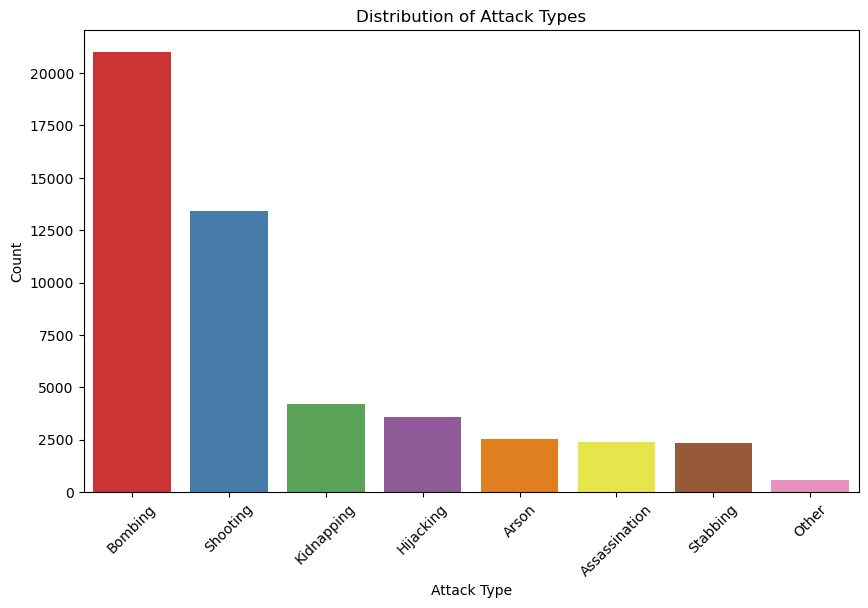

In [39]:
# Count the occurrences of each attack type
attack_type_counts = terror_attack['Attack_Type'].value_counts()

# Create a custom color palette for the bars
colors = sns.color_palette('Set1', len(attack_type_counts))

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, palette=colors)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

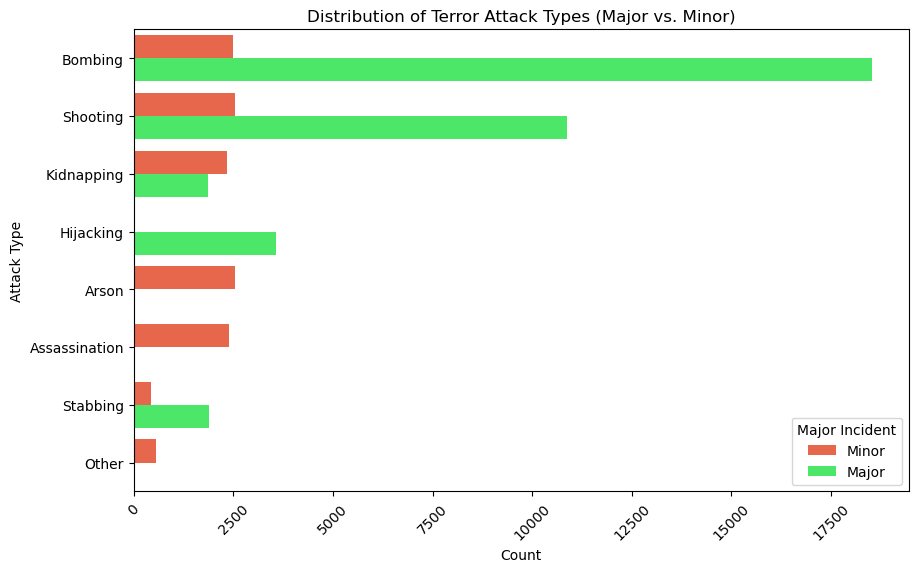

In [40]:
# Create a custom color palette
custom_palette = ['#FF5733', '#33FF57']  # Specify the colors you want for 'Minor' and 'Major'

# Create the countplot with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, y='Attack_Type', hue='Major_Incident',
              order=terror_attack['Attack_Type'].value_counts().index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Distribution of Terror Attack Types (Major vs. Minor)')
plt.xticks(rotation=45)
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

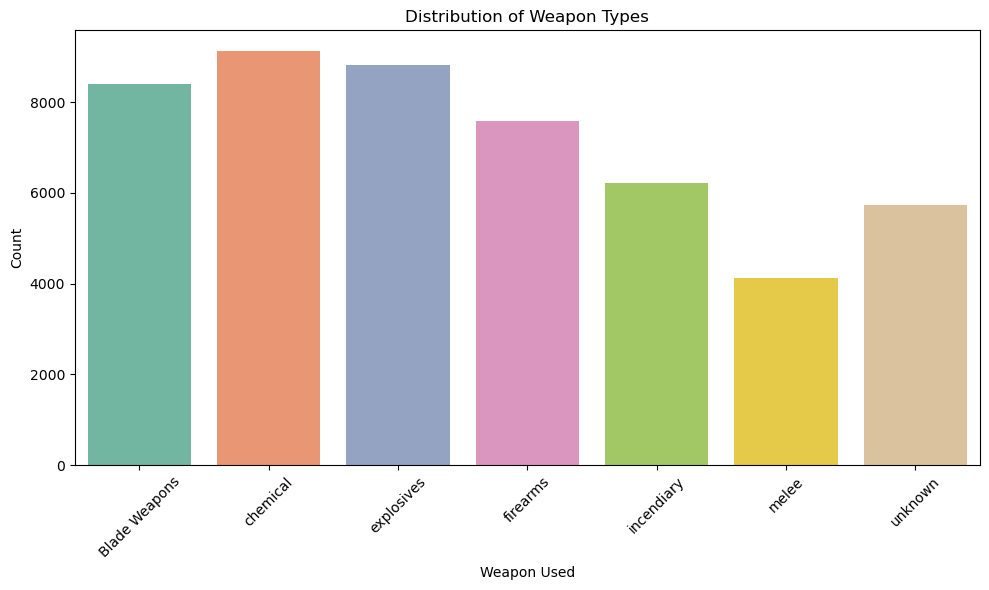

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Weapon_Used', palette='Set2')
plt.xticks(rotation=45, fontsize=10)  # Adjust the fontsize and rotation for better readability
plt.xlabel('Weapon Used')
plt.ylabel('Count')
plt.title('Distribution of Weapon Types')
plt.tight_layout()

# Show the plot
plt.show()

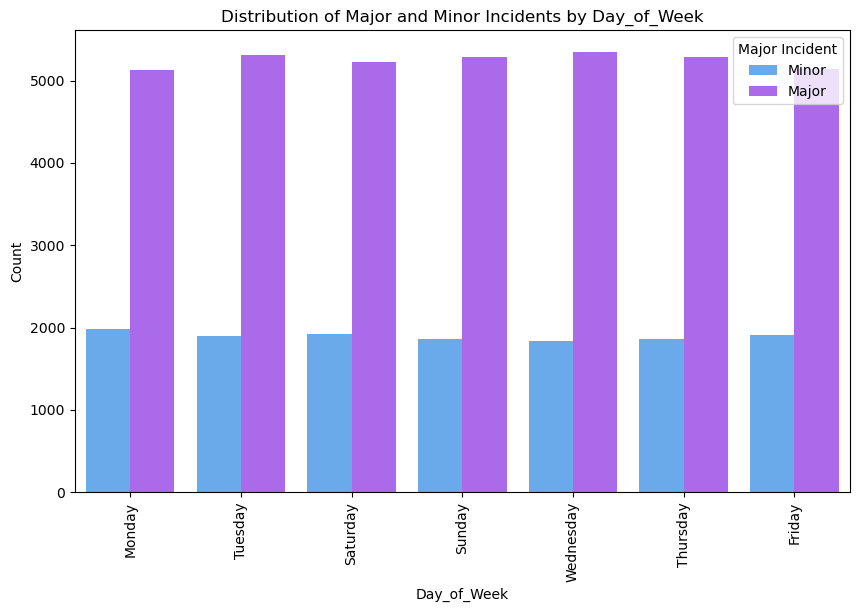

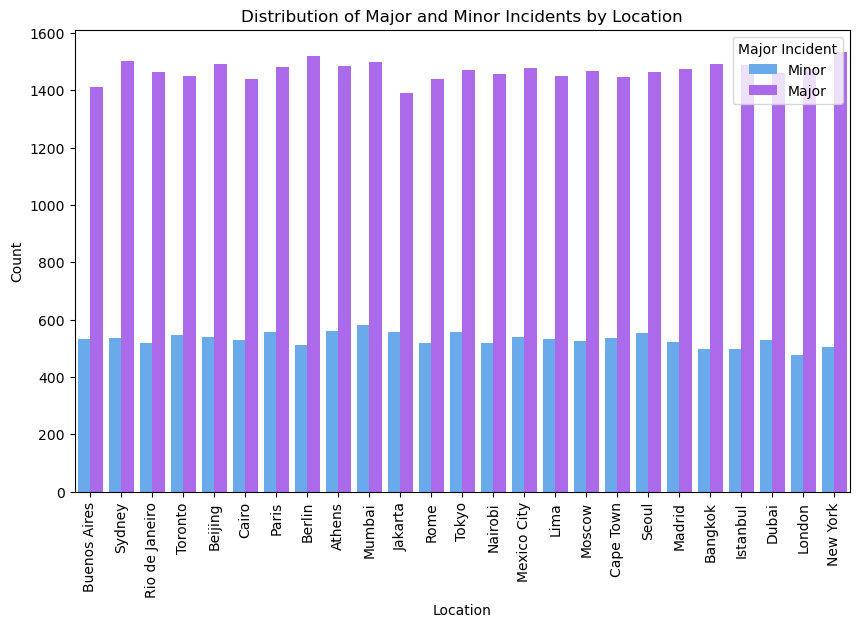

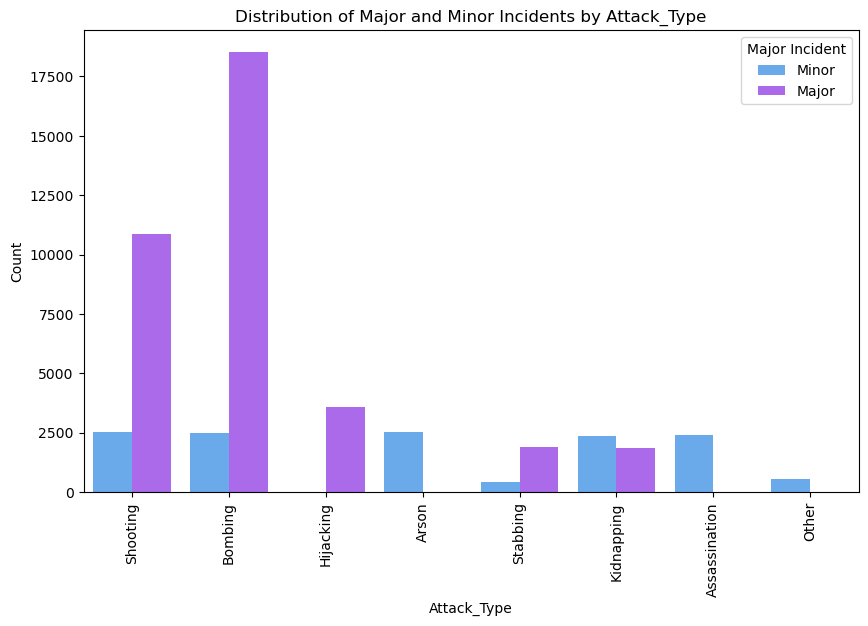

In [42]:
categorical_columns = ['Day_of_Week', 'Location', 'Attack_Type']

# Define a Seaborn summer color palette
summer_palette = sns.color_palette("cool", n_colors=2)  # Using a palette with 2 colors (for 'Minor' and 'Major')

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=terror_attack, x=col, hue='Major_Incident', palette=summer_palette)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of Major and Minor Incidents by {col}')
    plt.legend(title='Major Incident', labels=['Minor', 'Major'])
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.show()

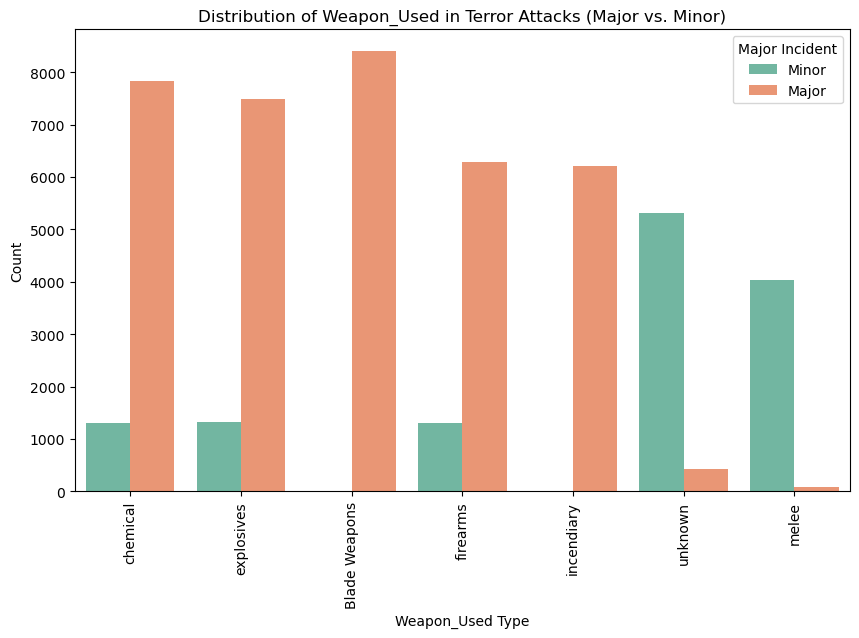

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Weapon_Used', hue='Major_Incident',
              order=terror_attack['Weapon_Used'].value_counts().index, palette='Set2')
plt.xlabel('Weapon_Used Type')
plt.ylabel('Count')
plt.title('Distribution of Weapon_Used in Terror Attacks (Major vs. Minor)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

### Target Type:

In [44]:
terror_attack['Target_Type'] = terror_attack['Target_Type'].apply(lambda x: spell(x))

In [45]:
# Convert the values in the 'Target_Type' column to lowercase
terror_attack['Target_Type'] = terror_attack['Target_Type'].str.lower()

# Define a mapping dictionary to standardize the target types
target_type_mapping = {
    'civilians': 'civilians',
    'civilian': 'civilians',
    'government officials': 'government officials',
    'government official': 'government officials',
    'government officials': 'government officials',
    'tourists': 'tourists',
    'tourist': 'tourists',
    'infrastructure': 'infrastructure',
    'police': 'police',
    'policy': 'government officials',
    'government officials': 'government officials',
    'place': 'infrastructure',
    'notice': 'infrastructure',
    'businesses': 'businesses',
    'business': 'businesses',
    'tourism':'tourists',
    'governmentkofficials':'government officials',
    'governmentmofficials':'government officials',
    'governmentrofficials':'government officials',
    'governmentiofficials':'government officials',
    'governmenttofficials':'government officials',
    'governmentqofficials':'government officials',
    'governmentyofficials':'government officials',
    'governmentsofficials':'government officials',
    'governmentgofficials':'government officials',
    'governmentvofficials':'government officials',
    'governmentjofficials':'government officials',
    'governmentcofficials':'government officials',
    'governmentbofficials':'government officials',
    'governmentwofficials':'government officials',
    'governmentdofficials':'government officials',
    'governmentxofficials':'government officials',
    'governmenthofficials':'government officials',
    'governmentoofficials':'government officials',
    'governmenteofficials':'government officials',
    'governmentfofficials':'government officials',
    'governmentaofficials':'government officials',
    'governmentuofficials':'government officials',
    'governmentpofficials':'government officials',
    'governmentlofficials':'government officials',
    # ... continue adding more mappings
}

# Apply the mapping using the replace method
terror_attack['Target_Type'] = terror_attack['Target_Type'].replace(target_type_mapping)

# Print the updated unique values in the 'Target_Type' column
print(terror_attack['Target_Type'].unique())

['civilians' 'tourists' nan 'infrastructure' 'police'
 'government officials']


In [46]:
target_type_counts = terror_attack['Target_Type'].value_counts()
print(target_type_counts)

government officials    9056
infrastructure          9008
civilians               8801
tourists                8687
police                  8408
Name: Target_Type, dtype: int64


In [47]:
# Define columns to use for grouping
columns_to_group_by = ['country', 'Attack_Type']

# Create a function to fill NaN values with the mode within each group for 'Target_Type'
def fill_mode_within_group(group):
    mode_target_type = group['Target_Type'].mode().iloc[0]  # Use iloc[0] to handle multiple modes
    group['Target_Type'].fillna(mode_target_type, inplace=True)
    return group

# Apply the function to fill missing 'Target_Type' values within each group
terror_attack = terror_attack.groupby(columns_to_group_by).apply(fill_mode_within_group)

# Check for remaining missing values in 'Target_Type' column
missing_target_type = terror_attack[terror_attack['Target_Type'].isna()]

# Print rows with missing 'Target_Type' for inspection (should be empty now)
print(missing_target_type)

Empty DataFrame
Columns: [Date, Day_of_Week, Location, Attack_Type, Perpetrator, Known_Associates, Victims_Injured, Victims_Deceased, Target_Type, Weapon_Used, Claimed_By, Intelligence_Tip, Motive, Operational_Success, Operatives_Captured, Financial_Support, Training_Location, Communication_Method, Major_Incident, country, Year]
Index: []

[0 rows x 21 columns]


In [48]:
target_type_counts = terror_attack['Target_Type'].value_counts()
print(target_type_counts)

government officials    11097
infrastructure          10622
civilians                9937
tourists                 9543
police                   8801
Name: Target_Type, dtype: int64


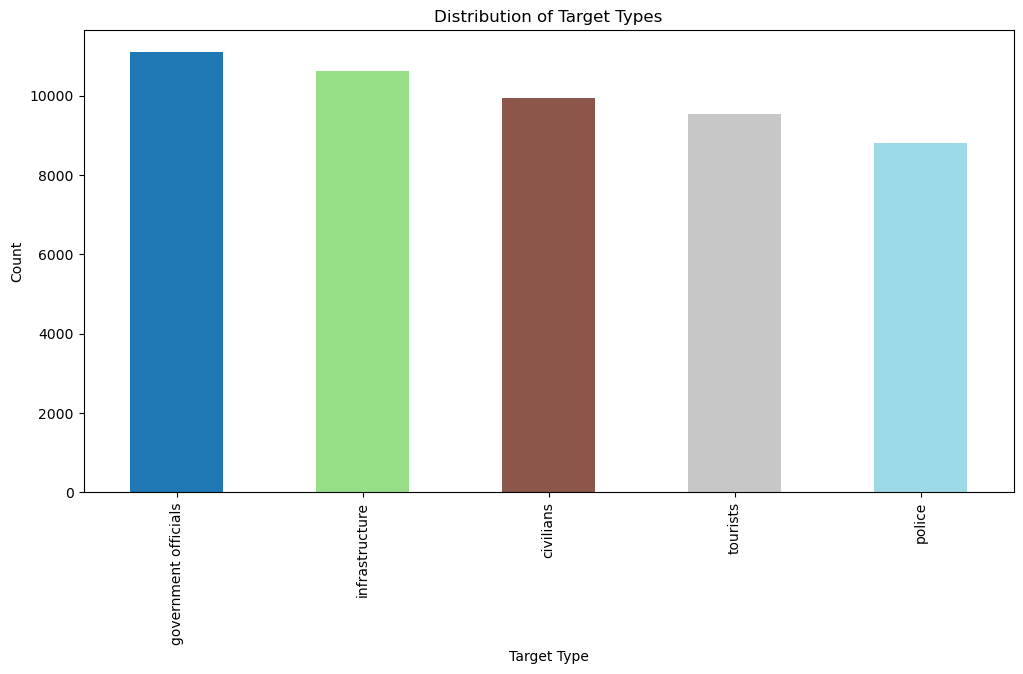

In [49]:
# Count the occurrences of each 'Target_Type' value
target_type_counts = terror_attack['Target_Type'].value_counts()

# Define a custom color palette with different colors for each 'Target_Type'
custom_colors = plt.cm.tab20(np.linspace(0, 1, len(target_type_counts)))

# Create a bar chart with custom colors
plt.figure(figsize=(12, 6))
target_type_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Target Types')
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

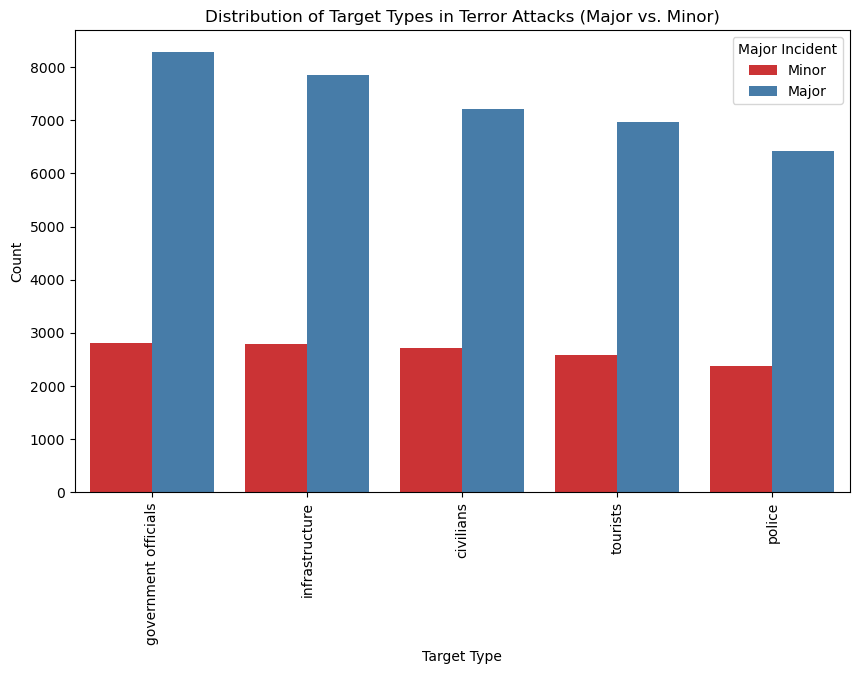

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Target_Type', hue='Major_Incident',
              order=terror_attack['Target_Type'].value_counts().index, palette='Set1')
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.title('Distribution of Target Types in Terror Attacks (Major vs. Minor)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

### Claimed By:

In [51]:
terror_attack['Claimed_By'] = terror_attack['Claimed_By'].apply(lambda x: spell(x))

In [52]:
terror_attack.Claimed_By.unique()

array(['Unknown', 'Group C', 'Group D', nan, 'Group B', 'unknown',
       'Group A', 'Group q', 'group B', 'Grouped', 'Group k', 'group a',
       'group d', 'group c', 'group C', 'Group', 'Group m', 'group A',
       'group b', 'Group i', 'Group a', 'Group u', 'Group p', 'Group x',
       'group D', 'Groups', 'group', 'Group l', 'Group w', 'Group y',
       'Group b', 'Group c', 'Group z', 'Group d', 'Group o', 'Group s',
       'Group e', 'group g', 'Group r', 'Group h', 'Group n', 'Group t',
       'Group v', 'Group f', 'group y', 'Group g', 'grouped', 'Group j',
       'group k', 'group r', 'group t', 'group s', 'group h', 'group o'],
      dtype=object)

In [53]:
# Convert the values in the 'Target_Type' column to lowercase
terror_attack['Claimed_By'] = terror_attack['Claimed_By'].str.lower()

Claimed_By_mapping1 = {'Unknown':'Unknown', 'Group C':'Group C', 'Group D':'Group D', 'Group B':'Group B', 'unknown':'Unknown', 'Group A':'Group A',
       'Group q':'Unknown', 'group B':'Group B', 'Grouped':'Unknown', 'Group k':'Unknown', 'group a':'Group A', 'group d':'Group D',
       'group c':'Group C', 'group C':'Group C', 'Group':'Unknown', 'Group m':'Unknown', 'group A':'Group A', 'group b':'Group B',
       'Group i':'Unknown', 'Group a':'Group A', 'Group u':'Unknown', 'Group p':'Unknown', 'Group x':'Unknown', 'group D':'Group D',
       'Groups':'Unknown', 'group':'Unknown', 'Group l':'Unknown', 'Group w':'Unknown', 'Group y':'Unknown', 'Group b':'Group B',
       'Group c':'Group C', 'Group z':'Group C', 'Group d':'Group D', 'Group o':'Unknown', 'Group s':'Unknown', 'Group e':'Unknown',
       'group g':'Unknown', 'Group r':'Unknown', 'Group h':'Unknown', 'Group n':'Unknown', 'Group t':'Unknown', 'Group v':'Unknown',
       'Group f':'Unknown', 'group y':'Unknown', 'Group g':'Unknown', 'grouped':'Unknown', 'Group j':'Unknown', 'group k':'Unknown',
       'group r':'Unknown', 'group t':'Unknown', 'group s':'Unknown', 'group h':'Unknown', 'group o':'Unknown'
}

# Apply the mapping to the 'Claimed_By' column
terror_attack['Claimed_By'] = terror_attack['Claimed_By'].map(Claimed_By_mapping1)

In [54]:
terror_attack.Claimed_By.unique()

array(['Unknown', 'Group C', 'Group D', nan, 'Group B', 'Group A'],
      dtype=object)

In [55]:
# Fill missing "Claimed_By" based on "Perpetrator" when available
terror_attack.loc[terror_attack['Claimed_By'].isna(), 'Claimed_By'] = terror_attack['Perpetrator']

In [56]:
terror_attack.Claimed_By.unique()

array(['Unknown', 'Group C', 'Group D', 'Group B', 'Group A'],
      dtype=object)

<Figure size 1200x600 with 0 Axes>

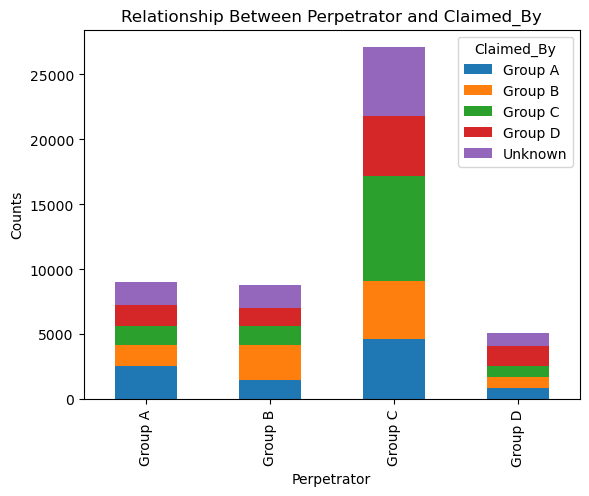

In [57]:
# Group the data by 'Perpetrator' and count the occurrences of each 'Claimed_By' value
grouped_data = terror_attack.groupby('Perpetrator')['Claimed_By'].value_counts().unstack().fillna(0)

# Create a bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Perpetrator and Claimed_By')
plt.xlabel('Perpetrator')
plt.ylabel('Counts')
plt.legend(title='Claimed_By')
plt.show()

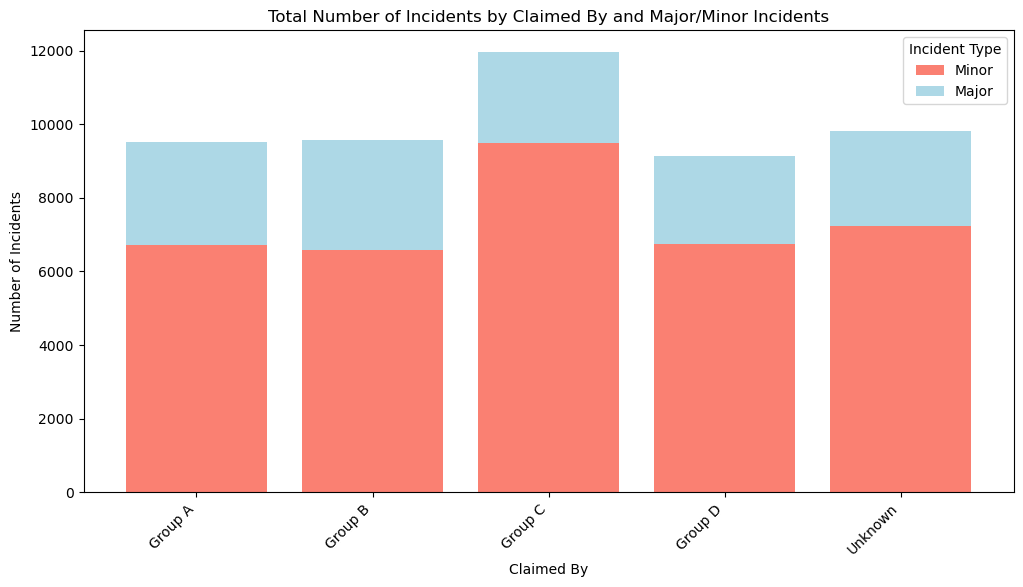

In [58]:
# Group the data by 'Claimed_By' and 'Major_Incident' and count the number of incidents
claim_major_minor_counts = terror_attack.groupby(['Claimed_By', 'Major_Incident']).size().reset_index(name='Count')

# Create a bar plot to visualize the total number of incidents for each group
plt.figure(figsize=(12, 6))

# Define the colors for major and minor incidents
colors = {"Major": "salmon", "Minor": "lightblue"}

# Iterate through the Claimed_By groups and plot bars
for i, claimed_by_group in enumerate(claim_major_minor_counts['Claimed_By'].unique()):
    data = claim_major_minor_counts[claim_major_minor_counts['Claimed_By'] == claimed_by_group]
    major_counts = data[data['Major_Incident'] == 1]['Count'].values[0]
    minor_counts = data[data['Major_Incident'] == 0]['Count'].values[0]

    # Plot major incident counts
    plt.bar(i, major_counts, color=colors["Major"], label="Major" if i == 0 else "")

    # Plot minor incident counts
    plt.bar(i, minor_counts, bottom=major_counts, color=colors["Minor"], label="Minor" if i == 0 else "")

plt.xlabel('Claimed By')
plt.ylabel('Number of Incidents')
plt.title('Total Number of Incidents by Claimed By and Major/Minor Incidents')

# Add x-axis labels for each Claimed_By group
plt.xticks(range(len(claim_major_minor_counts['Claimed_By'].unique())), claim_major_minor_counts['Claimed_By'].unique(), rotation=45, ha='right')

# Add a legend
plt.legend(title='Incident Type', labels=['Minor', 'Major'])

plt.show()

### Training Location:

In [59]:
terror_attack['Training_Location'] = terror_attack['Training_Location'].apply(lambda x: spell(x))

In [60]:
# Convert the values in the 'Training_Location' column to lowercase
terror_attack['Training_Location'] = terror_attack['Training_Location'].str.lower()

# Define a mapping dictionary to standardize the weapon names
weapon_mapping = {
    'abroad':'Abroad', 'domestic':'Domestic', 'broad':'Abroad'
}

# Apply the mapping using the replace method
terror_attack['Training_Location'] = terror_attack['Training_Location'].replace(weapon_mapping)

# Print the updated unique values in the 'Training_Location' column
print(terror_attack['Training_Location'].unique())

['Domestic' 'Abroad' nan]


In [61]:
# Create a crosstab between 'Training_Location' and 'Perpetrator'
cross_tab = pd.crosstab(terror_attack['Training_Location'], terror_attack['Perpetrator'])

# Display the cross-tabulation
print(cross_tab)

Perpetrator        Group A  Group B  Group C  Group D
Training_Location                                    
Abroad                4490     4395    13323     2540
Domestic              4326     4239    13215     2452


In [62]:
# Mapping dictionary to associate each Perpetrator with a Training_Location
perpetrator_to_location_mapping = {
    'Group A': 'Abroad',
    'Group B': 'Domestic',
    'Group C': 'Domestic',
    'Group D': 'Abroad',
}

# Fill missing 'Training_Location' values based on 'Perpetrator' using the mapping dictionary
terror_attack['Training_Location'] = terror_attack['Training_Location'].fillna(terror_attack['Perpetrator'].map(perpetrator_to_location_mapping))

# Check for remaining missing values
missing_values = terror_attack[terror_attack['Training_Location'].isna()]

# Print rows with missing 'Training_Location' for inspection
print(missing_values)

Empty DataFrame
Columns: [Date, Day_of_Week, Location, Attack_Type, Perpetrator, Known_Associates, Victims_Injured, Victims_Deceased, Target_Type, Weapon_Used, Claimed_By, Intelligence_Tip, Motive, Operational_Success, Operatives_Captured, Financial_Support, Training_Location, Communication_Method, Major_Incident, country, Year]
Index: []

[0 rows x 21 columns]


In [63]:
print(terror_attack['Training_Location'].unique())

['Domestic' 'Abroad']


<Figure size 1200x600 with 0 Axes>

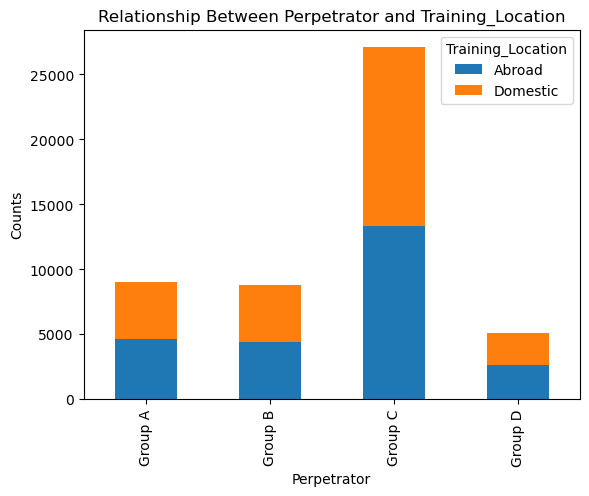

In [64]:
# Group the data by 'Perpetrator' and count the occurrences of each 'Claimed_By' value
grouped_data = terror_attack.groupby('Perpetrator')['Training_Location'].value_counts().unstack().fillna(0)

# Create a bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Relationship Between Perpetrator and Training_Location')
plt.xlabel('Perpetrator')
plt.ylabel('Counts')
plt.legend(title='Training_Location')
plt.show()

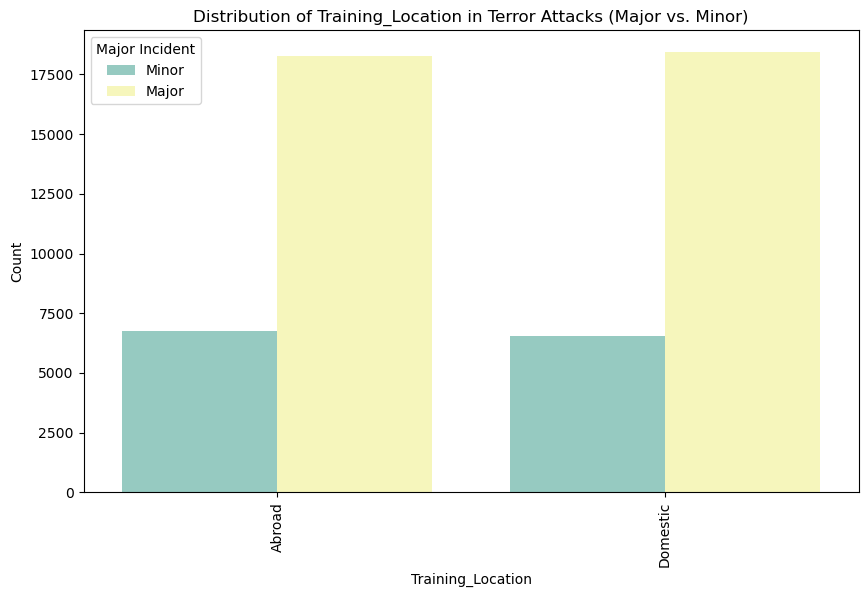

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Training_Location', hue='Major_Incident',
              order=terror_attack['Training_Location'].value_counts().index, palette='Set3')
plt.xlabel('Training_Location')
plt.ylabel('Count')
plt.title('Distribution of Training_Location in Terror Attacks (Major vs. Minor)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

### Victims Injured and Deceased:

In [66]:
print(terror_attack['Victims_Injured'].unique())

[ nan   5.  49.  27.  33.  58.   1.   2.  39.  32. -10.  22.   3.  15.
   4.  24.  37.  46.  19.  43.  34.  38.  44.  59.  35.  13.  -8.   0.
   9.  30.  23.  29.  28.  21.  18.  16.  45.  12.  14.   6.  50.  17.
  42.  60.  20.  31.  26.  40.  47.  36.  52.  25.  -9.  55.  11.  -2.
  51.   7.  48.  53.   8.  41.  56.  -1.  54.  10.  -3.  -7.  -5.  -6.
  -4.  57.]


In [67]:
print(terror_attack['Victims_Deceased'].unique())

[19. 21. 11. 14. 24. 25.  7. 10. 15. nan 23. 22. 16.  6. 17.  8. 18.  4.
 13. 12.  3.  1.  9. 20.  0.  2.  5. -1. -5. -4. -2. -3.]


In [68]:
# Fill missing 'Victims_Injured' and 'Victims_Deceased' values based on 'Perpetrator'
terror_attack['Victims_Injured'] = terror_attack.groupby('Perpetrator')['Victims_Injured'].transform(lambda x: x.fillna(x.mean()))
terror_attack['Victims_Deceased'] = terror_attack.groupby('Perpetrator')['Victims_Deceased'].transform(lambda x: x.fillna(x.mean()))

In [69]:
# Remove negative values in the 'Victims_Injured' column
terror_attack['Victims_Injured'] = terror_attack['Victims_Injured'].clip(lower=0)

# Remove negative values in the 'Victims_Deceased' column
terror_attack['Victims_Deceased'] = terror_attack['Victims_Deceased'].clip(lower=0)

In [70]:
print(terror_attack['Victims_Injured'].unique())

[27.33403021  5.         49.         27.         33.         58.
  1.          2.         39.         32.          0.         22.
  3.         15.          4.         24.         37.         12.37831126
 46.         19.         43.         34.         38.         44.
 59.         35.         13.         12.20475561  9.         30.
 23.         29.         28.         21.         18.         16.
 45.         12.         14.          6.         50.         17.
 42.         60.         21.20191263 20.         31.         26.
 40.         47.         36.         52.         25.         55.
 11.         51.          7.         48.         53.          8.
 41.         56.         54.         10.         57.        ]


In [71]:
print(terror_attack['Victims_Deceased'].unique())

[19.         21.         11.         14.         24.         25.
  7.         10.         15.         10.13429313 23.         22.
 16.          6.         17.          8.         18.          4.
 13.         12.          3.          1.          9.         20.
  0.          2.         10.22977346  5.         16.91707985 14.32629061]


<Figure size 1200x600 with 0 Axes>

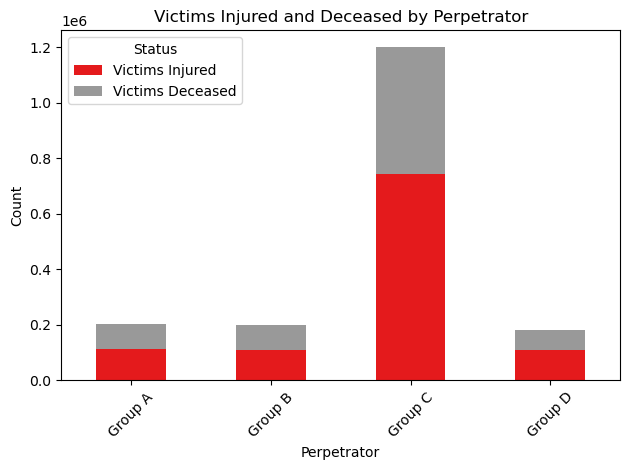

In [72]:
# Group the data by 'Perpetrator' and calculate the sum of victims injured and deceased
grouped_data = terror_attack.groupby('Perpetrator')[['Victims_Injured', 'Victims_Deceased']].sum()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Victims Injured and Deceased by Perpetrator')
plt.xlabel('Perpetrator')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Status', labels=['Victims Injured', 'Victims Deceased'])
plt.tight_layout()
plt.show()

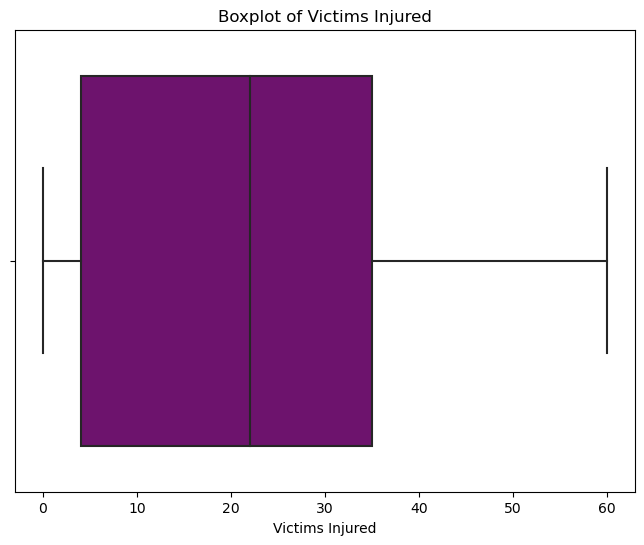

In [73]:
# Assuming you have a DataFrame named terror_attack
victims_injured_column = terror_attack['Victims_Injured']

# Create a boxplot for 'Victims_Injured' using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=victims_injured_column, orient='h', color='purple', saturation=0.7)
plt.title('Boxplot of Victims Injured')
plt.xlabel('Victims Injured')
plt.show()

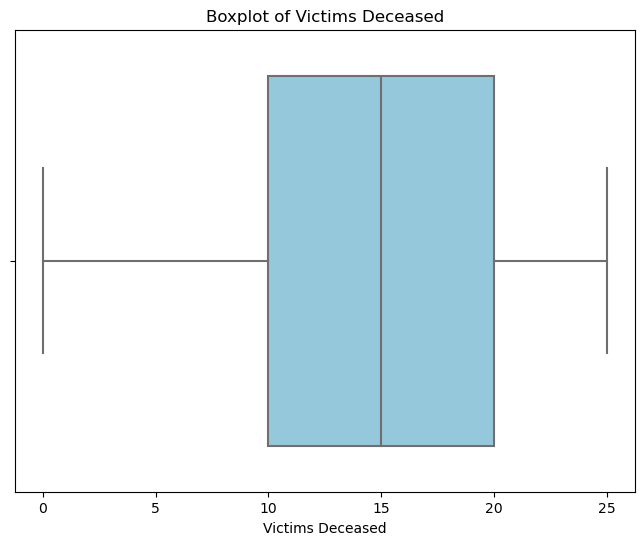

In [74]:
# Assuming you have a DataFrame named terror_attack
victims_deceased_column = terror_attack['Victims_Deceased']

# Create a boxplot for 'Victims_Deceased' using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=victims_deceased_column, orient='h', color='skyblue', saturation=0.7)
plt.title('Boxplot of Victims Deceased')
plt.xlabel('Victims Deceased')
plt.show()

### Casualties:

In [75]:
# Calculate the 'Casualties' column as the sum of 'Victims_Deceased' and 'Victims_Injured'
terror_attack['Casualties'] = terror_attack['Victims_Deceased'] + terror_attack['Victims_Injured']

# Check for missing values in the newly created 'Casualties' column
missing_casualties = terror_attack['Casualties'].isna().sum()

# Display the DataFrame with the updated 'Casualties' column
print(terror_attack[['Victims_Deceased', 'Victims_Injured', 'Casualties']])

       Victims_Deceased  Victims_Injured  Casualties
0                  19.0        27.334030   46.334030
1                  21.0         5.000000   26.000000
2                  11.0        49.000000   60.000000
3                  14.0        27.334030   41.334030
4                  24.0        27.000000   51.000000
...                 ...              ...         ...
49995              23.0        12.204756   35.204756
49996               4.0         5.000000    9.000000
49997               8.0         0.000000    8.000000
49998              10.0        17.000000   27.000000
49999              16.0        38.000000   54.000000

[50000 rows x 3 columns]


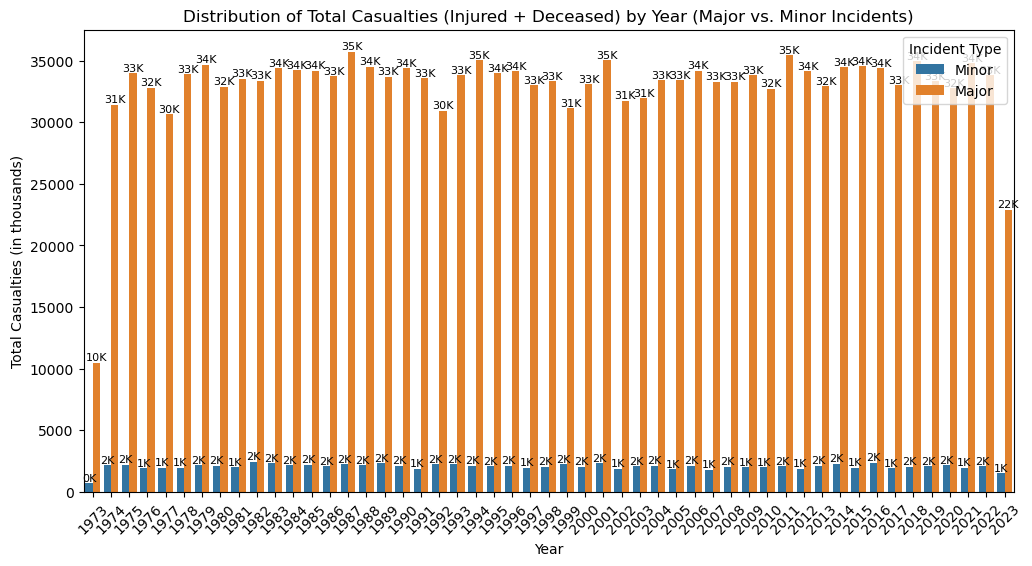

In [76]:
# Create a new column 'Total_Casualties' by summing 'Victims_Injured' and 'Victims_Deceased'
terror_attack['Casualties'] = terror_attack['Victims_Injured'] + terror_attack['Victims_Deceased']

# Group data by year, major/minor incidents, and calculate total casualties
yearly_casualties = terror_attack.groupby(['Year', 'Major_Incident'])['Casualties'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_casualties, x='Year', y='Casualties', hue='Major_Incident')
plt.xlabel('Year')
plt.ylabel('Total Casualties (in thousands)')
plt.title('Distribution of Total Casualties (Injured + Deceased) by Year (Major vs. Minor Incidents)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Format numbers on the bars in thousands
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height/1000)}K', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

# Create a legend outside the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Incident Type', labels=['Minor', 'Major'], loc='upper right')

plt.show()

### Intelligence Tip:

In [77]:
terror_attack['Intelligence_Tip'] = terror_attack['Intelligence_Tip'].apply(lambda x: spell(x))

In [78]:
# Convert the values in the 'Weapon_Used' column to lowercase
terror_attack['Intelligence_Tip'] = terror_attack['Intelligence_Tip'].str.lower()

# Define a mapping dictionary to standardize the weapon names
Intelligence_Tip_mapping = {
    'Unknown':'Unknown', 'No':'No', 'Yes':'Yes', 'yes':'Yes', 'In':'Unknown', 'fes':'Yes', 'unknown':'Unknown', 'no':'No', 'ves':'Yes',
    'Is':'Unknown', 'Yas':'Yes', 'Ne':'No', 'ao':'No', 'xo':'No', 'N':'No', 'Yea':'Yes', 'jo':'No', 'hes':'Yes', 'qo':'No', 'X':'Unknown',
    'Ny':'No', 'Nc':'No', 'Na':'No', 'to':'No', 'Yer':'Yes', 'ko':'No', 'Ng':'No', 'bo':'No', 'vo':'No', 'io':'No', 'Ni':'No',
    'Nh':'No', 'ces':'Yes', 'nes':'Yes', 'You':'Unknown', 'Gt':'Unknown', 'use':'Yes', 'P':'Unknown', 'ees':'Yes', 'ies':'Yes', 'oo':'No',
    'zo':'No', 'so':'No', 'Nv':'No', 'W':'Unknown', 'pes':'Yes', 'do':'No', 'Yet':'Yes', 'res':'Yes', 'yee':'Yes', 'Nb':'No',
    'Ns':'No', 'go':'No', 'nl':'No', 'ro':'No', 'Web':'Unknown', 'Ref':'Unknown', 'Nu':'No', 'bes':'Yes', 'lo':'No', 'wes':'Yes',
    'Nl':'No', 'Yds':'Yes', 'Nm':'No', 'fo':'No', 'po':'No', 'Nr':'No', 'des':'Yes', 'Yep':'Yes', 'Em':'Unknown', 'Yen':'Yes',
    'ses':'Yes', 'Nj':'No', 'uo':'No', 'Yew':'Yes', 'ho':'No', 'Nf':'No', 'Yee':'Yes', 'wo':'No', 'co':'No', 'Yeh':'Yes',
    'np':'No', 'kes':'Yes', 'aes':'Yes', 'eo':'No', 'yo':'No', 'Its':'Unknown', 'mo':'No', 'ny':'No', 'em':'Unknown', 'mes':'Yes',
    'Nd':'No', 'les':'Yes', 'ges':'Yes', 'yep':'Yes', 'nd':'No', 'tes':'Yes','in':'Unknown', 'is':'Unknown', 'yas':'Yes', 'ne':'No', 'n':'No', 'yea':'Yes', 'x':'Unknown', 'nc':'No', 'na':'No', 'yer':'Yes',
    'ng':'No', 'ni' :'No','nh':'No', 'you':'Unknown', 'gt':'Unknown', 'p':'Unknown', 'nv':'No', 'w':'Unknown', 'yet':'Yes', 'nb':'No', 'ns':'No', 'web':'Unknown', 'ref' :'Unknown','nu':'No',
    'yds':'Yes', 'nm':'No', 'nr':'No', 'yen':'Yes', 'nj':'No', 'yew':'Yes', 'nf':'No', 'yeh':'Yes', 'its':'Unknown'
}

# Apply the mapping using the replace method
terror_attack['Intelligence_Tip'] = terror_attack['Intelligence_Tip'].replace(Intelligence_Tip_mapping)

# Print the updated unique values in the 'Intelligence_Tip' column
print(terror_attack['Intelligence_Tip'].unique())

['Unknown' 'No' 'Yes' nan]


In [79]:
# Define columns to use for grouping
columns_to_group_by = ['Attack_Type', 'Perpetrator', 'Claimed_By']

# Group by relevant columns and fill missing 'Intelligence_Tip' with mode within each group
for group, group_df in terror_attack.groupby(columns_to_group_by):
    mode_intelligence_tip = group_df['Intelligence_Tip'].mode().iloc[0]  # Use iloc[0] to handle multiple modes
    terror_attack.loc[group_df.index, 'Intelligence_Tip'] = mode_intelligence_tip

# Check for remaining missing values
missing_intelligence_tip = terror_attack[terror_attack['Intelligence_Tip'].isna()]

# Print rows with missing 'Intelligence_Tip' for inspection
print(missing_intelligence_tip)

Empty DataFrame
Columns: [Date, Day_of_Week, Location, Attack_Type, Perpetrator, Known_Associates, Victims_Injured, Victims_Deceased, Target_Type, Weapon_Used, Claimed_By, Intelligence_Tip, Motive, Operational_Success, Operatives_Captured, Financial_Support, Training_Location, Communication_Method, Major_Incident, country, Year, Casualties]
Index: []

[0 rows x 22 columns]


In [80]:
# Print the updated unique values in the 'Intelligence_Tip' column
print(terror_attack['Intelligence_Tip'].unique())

['Unknown' 'Yes' 'No']


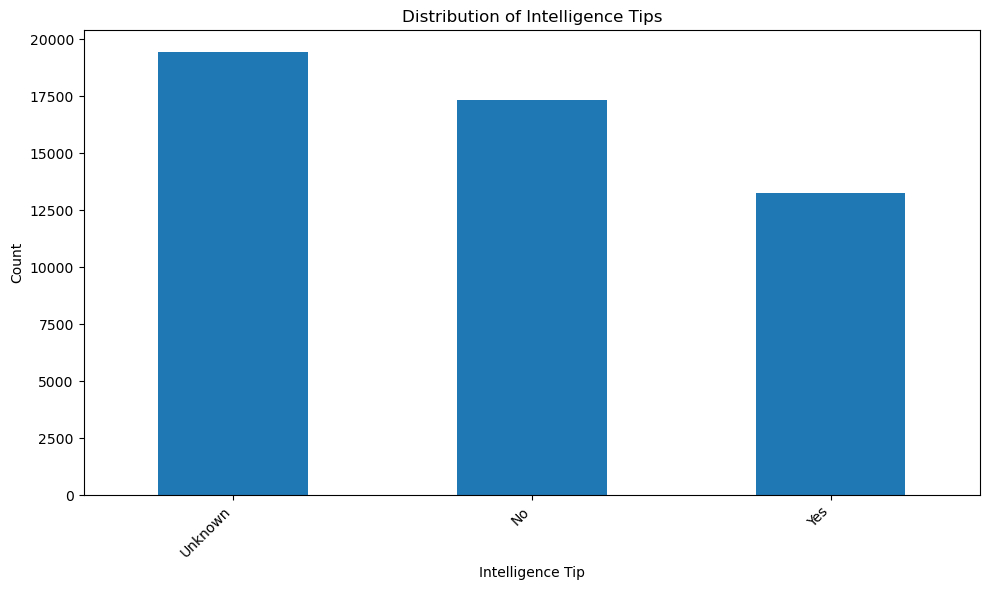

In [81]:
# Count the occurrences of each 'Intelligence_Tip' value
intelligence_tip_counts = terror_attack['Intelligence_Tip'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
intelligence_tip_counts.plot(kind='bar')
plt.title('Distribution of Intelligence Tips')
plt.xlabel('Intelligence Tip')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

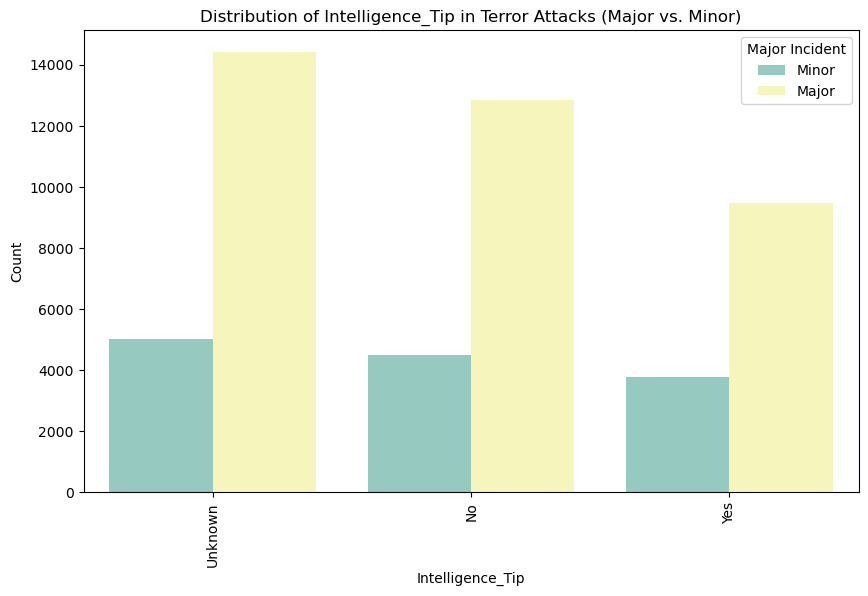

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Intelligence_Tip', hue='Major_Incident',
              order=terror_attack['Intelligence_Tip'].value_counts().index, palette='Set3')
plt.xlabel('Intelligence_Tip')
plt.ylabel('Count')
plt.title('Distribution of Intelligence_Tip in Terror Attacks (Major vs. Minor)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

### Communication Method:

In [83]:
terror_attack['Communication_Method'] = terror_attack['Communication_Method'].apply(lambda x: spell(x))

In [84]:
# Convert the values in the 'Communication_Method' column to lowercase
terror_attack['Communication_Method'] = terror_attack['Communication_Method'].str.lower()

# Define a mapping dictionary to standardize the weapon names
weapon_mapping = {
    'Telephones':'Telephones', 'Internet':'Internet', 'cellphone':'cellphone', 'Courier':'Courier', 'Unknown':'Unknown','internet':'Internet',
    'Cellphone':'cellphone', 'courier':'Courier', 'Copies':'Courier', 'Courses':'Courier', 'Curlers':'Carriers', 'tourists':'Carriers',
    'telephones':'Telephones', 'Workers':'Carriers', 'courses':'Courier', 'headphones':'Telephones', 'borders':'Unknown',
    'Carriers':'Carriers', 'workers':'Unknown', 'sources':'Unknown', 'Interest':'Internet', 'Corners':'Courier',
    'Headphones':'Telephones', 'carriers':'Carriers', 'Sources':'Unknown', 'Soldiers':'Carriers', 'interest':'Internet',
    'Covers':'Carriers', 'Orders':'Carriers', 'mourners':'Carriers', 'courtiers':'Courier', 'orders':'Unknown', 'covers':'Courier',
    'courts':'Unknown', 'founders':'Unknown', 'couplers':'Carriers', 'soldiers':'Carriers', 'cruisers':'Carriers','copies':'Courier', 'curlers':'Carriers','corners':'Carriers'
}

# Apply the mapping using the replace method
terror_attack['Communication_Method'] = terror_attack['Communication_Method'].replace(weapon_mapping)

# Print the updated unique values in the 'Communication_Method' column
print(terror_attack['Communication_Method'].unique())

['Telephones' 'Internet' nan 'cellphone' 'Courier' 'Carriers' 'Unknown']


In [85]:
# Calculate the mode for each group
mode_by_group = terror_attack.groupby('Perpetrator')['Communication_Method'].apply(lambda x: x.mode().iloc[0])

# Fill missing values using the calculated mode for each group
terror_attack['Communication_Method'] = terror_attack.apply(
    lambda row: mode_by_group[row['Perpetrator']] if pd.isnull(row['Communication_Method']) else row['Communication_Method'],
    axis=1
)

# Print the result
print(terror_attack['Communication_Method'])

0        Telephones
1          Internet
2          Internet
3         cellphone
4        Telephones
            ...    
49995     cellphone
49996      Internet
49997       Courier
49998       Courier
49999       Courier
Name: Communication_Method, Length: 50000, dtype: object


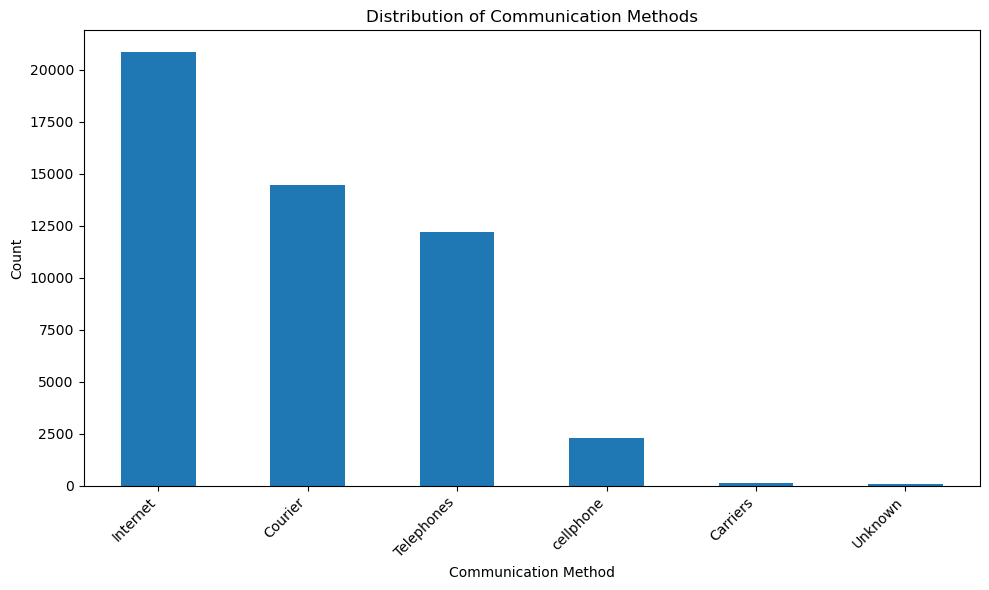

In [86]:
# Count the occurrences of each 'Communication_Method' value
communication_method_counts = terror_attack['Communication_Method'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
communication_method_counts.plot(kind='bar')
plt.title('Distribution of Communication Methods')
plt.xlabel('Communication Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Motive:

In [87]:
terror_attack['Motive'] = terror_attack['Motive'].apply(lambda x: spell(x))

In [88]:
# Convert the values in the 'Target_Type' column to lowercase
terror_attack['Motive'] = terror_attack['Motive'].str.lower()

attack_type_mapping1 = {
    'religious': 'Religious',
    'Religious':'Religious',
    'ethnic': 'Ethnic',
    'Ethnic': 'Ethnic',
    'political':'Political',
    'Political':'Political',
    'retaliation':'Retaliation',
    'Revelation':'Retaliation',
    'Retaliation':'Retaliation',
    'unknown':'Unknown',
    'Unknown':'Unknown',

}

# Apply the mapping to the 'Attack_Type' column
terror_attack['Motive'] = terror_attack['Motive'].map(attack_type_mapping1)

# Print the updated DataFrame
print(terror_attack)

            Date Day_of_Week        Location    Attack_Type Perpetrator  \
0     2013-08-26      Monday        Istanbul       Shooting     Group C   
1     2021-05-25     Tuesday         Nairobi        Bombing     Group A   
2     1998-12-19    Saturday            Lima      Hijacking     Group C   
3     2001-09-02      Sunday           Tokyo        Bombing     Group C   
4     2003-08-13   Wednesday           Paris        Bombing     Group C   
...          ...         ...             ...            ...         ...   
49995 1981-10-06     Tuesday          Athens      Hijacking     Group B   
49996 2000-11-14     Tuesday  Rio de Janeiro  Assassination     Group B   
49997 1993-10-24      Sunday           Paris          Arson     Group B   
49998 1978-03-09    Thursday        Istanbul        Bombing     Group C   
49999 2006-05-16     Tuesday            Lima        Bombing     Group C   

       Known_Associates  Victims_Injured  Victims_Deceased     Target_Type  \
0                   1

In [89]:
# Function to perform chi-squared test and return p-values
def chi_squared_test(data, target_column, feature_column):
    contingency_table = pd.crosstab(data[target_column], data[feature_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

In [90]:
# Define the target column
target_column_motive = 'Motive'

# Create a list of columns to test for association
columns_to_test = ['Day_of_Week', 'Location', 'Perpetrator', 'Target_Type', 'Claimed_By', 'Intelligence_Tip', 'Financial_Support', 'Training_Location', 'Communication_Method']

# Create a dictionary to store p-values for the Motive column
p_values_motive = {}

# Perform chi-squared tests for each column with Motive
for column in columns_to_test:
    p_motive = chi_squared_test(terror_attack, target_column_motive, column)
    p_values_motive[column] = p_motive

# Sort the dictionary by p-values
sorted_p_values_motive = {k: v for k, v in sorted(p_values_motive.items(), key=lambda item: item[1])}

# Print the sorted p-values for Motive
print("Sorted p-values for Motive:")
print(sorted_p_values_motive)

Sorted p-values for Motive:
{'Intelligence_Tip': 0.13153361159010699, 'Target_Type': 0.15753249287161167, 'Day_of_Week': 0.38678437365871965, 'Location': 0.4327813080915681, 'Communication_Method': 0.6486530817961159, 'Perpetrator': 0.707733609521116, 'Financial_Support': 0.8267391381225181, 'Claimed_By': 0.8938176532653649, 'Training_Location': 0.9485961654375069}


In [91]:
# Define columns to use for grouping
columns_to_group_by = ['Attack_Type', 'Perpetrator', 'Claimed_By']

# Group by relevant columns and fill missing 'Motive' with mode within each group
for group, group_df in terror_attack.groupby(columns_to_group_by):
    mode_motive = group_df['Motive'].mode().iloc[0]  # Use iloc[0] to handle multiple modes
    terror_attack.loc[group_df.index, 'Motive'] = mode_motive

# Check for remaining missing values
missing_motive = terror_attack[terror_attack['Motive'].isna()]

# Print rows with missing 'Motive' for inspection
print(missing_motive)

Empty DataFrame
Columns: [Date, Day_of_Week, Location, Attack_Type, Perpetrator, Known_Associates, Victims_Injured, Victims_Deceased, Target_Type, Weapon_Used, Claimed_By, Intelligence_Tip, Motive, Operational_Success, Operatives_Captured, Financial_Support, Training_Location, Communication_Method, Major_Incident, country, Year, Casualties]
Index: []

[0 rows x 22 columns]


In [92]:
print(terror_attack['Motive'].unique())

['Political' 'Religious' 'Ethnic' 'Unknown' 'Retaliation']


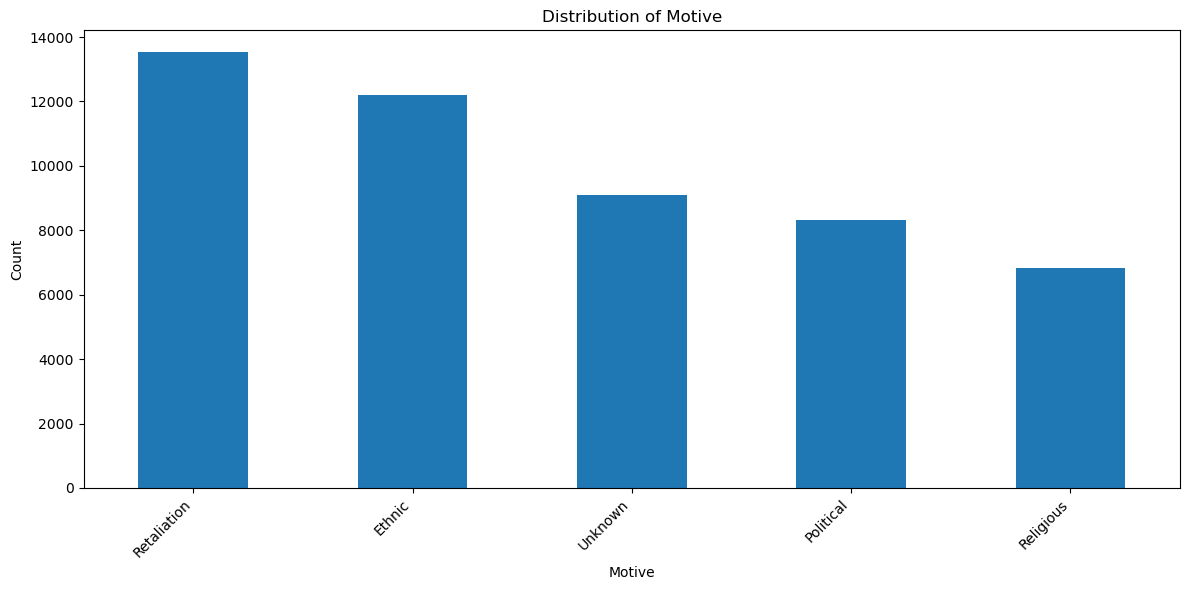

In [93]:
# Count the occurrences of each 'Motive' value
motive_counts = terror_attack['Motive'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
motive_counts.plot(kind='bar')
plt.title('Distribution of Motive')
plt.xlabel('Motive')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Operational Success:

In [94]:
terror_attack['Operational_Success'] = terror_attack['Operational_Success'].apply(lambda x: spell(x))

In [95]:
# Convert the values in the 'Weapon_Used' column to lowercase
terror_attack['Operational_Success'] = terror_attack['Operational_Success'].str.lower()

# Define a mapping dictionary to standardize the weapon names
weapon_mapping = {
    'oo':'No', 'to':'No', 'No':'No', 'Yes':'Yes', 'ro':'No', 'Unknown':'Unknown', 'unknown':'Unknown', 'Nl':'No', 'no':'No',
       'ao':'No', 'yes':'Yes', 'Yer':'Yes', 'so':'No', 'go':'No', 'Ne':'No', 'bes':'Yes', 'Nv':'No', 'Yep':'Yes', 'yew':'Yes',
       'uo':'No', 'nes':'Yes', 'Nr':'No', 'Ni':'No', 'X':'Unknown', 'bo':'No', 'ns':'No', 'lo':'No', 'kes':'Yes', 'nk':'No', 'xo':'No',
       'You':'Unknown', 'io':'No', 'Yeh':'Yes', 'Nf':'No', 'fes':'Yes', 'po':'No', 'Nb':'No', 'W':'Unknown', 'do':'No', 'Ny':'No', 'wo':'No',
       'Nj':'No', 'use':'Unknown', 'eo':'No', 'ees':'Yes', 'np':'No', 'Na':'No', 'vo':'No', 'Is':'Unknown', 'pes':'Yes', 'Nc':'No',
       'ies':'Yes', 'mes':'Yes', 'ges':'Yes', 'ses':'Yes', 'fo':'No', 'mo':'No', 'yep':'Yes', 'Nd':'No', 'ves':'Yes', 'jo':'No',
       'zo':'No', 'nm':'No', 'N':'Unknown', 'nf':'No', 'Yee':'Yes', 'qo':'No', 'yo':'No', 'P':'Unknown', 'des':'Yes', 'Yew':'Yes', 'res':'Yes',
       'Ng':'No', 'ho':'No', 'tes':'Yes', 'ko':'No', 'Web':'Unknown', 'its':'Unknown', 'Nu':'No', 'co':'No', 'ny':'No', 'Its':'Unknown',
       'nx':'No', 'nw':'No', 'Yds':'Yes', 'nt':'No', 'Ref':'Unknown', 'aes':'Yes', 'Ns':'No', 'Nm':'No', 'web':'Unknown', 'Yea':'Yes',
       'ces':'Yes', 'nj':'No', 'na':'No', 'Em':'Unknown', 'nl':'No', 'is':'Unknown', 'yet':'Yes', 'hes':'Yes', 'nr':'No', 'nz':'No',
       'Yen':'Yes', 'nd':'No', 'wes':'Yes', 'yas':'Yes', 'Nh':'No', 'In':'Unknown', 'les':'Yes', 'yee':'Yes', 'yrs':'Yes', 'Yet':'Yes',
       'nv':'No', 'nh':'No', 'Yas':'Yes', 'ref':'Unknown', 'Gt':'Unknown', 'you':'Unknown', 'nn':'No', 'nq':'No', 'nc':'No', 'ni':'No',
       'yds':'Yes', 'em':'Unknown', 'ne':'No', 'nb':'No', 'yen':'Yes', 'yea':'Yes', 'yer':'Yes', 'nu':'No', 'ng':'No', 'yeh':'Yes', 'x' :'Unknown','w' :'Unknown','n' :'Unknown','p' :'Unknown','in':'Unknown', 'gt':'Unknown'
    # ... continue adding more mappings
}

# Apply the mapping using the replace method
terror_attack['Operational_Success'] = terror_attack['Operational_Success'].replace(weapon_mapping)

# Print the updated unique values in the 'Operational_Success' column
print(terror_attack['Operational_Success'].unique())

['No' nan 'Yes' 'Unknown']


In [96]:
# Define the target column
target_column_operational_success = 'Operational_Success'

# Create a list of columns to test for association
columns_to_test = ['Day_of_Week', 'Location', 'Perpetrator', 'Target_Type', 'Motive', 'Claimed_By', 'Intelligence_Tip', 'Financial_Support', 'Training_Location', 'Communication_Method']

# Create a dictionary to store p-values for the Operational_Success column
p_values_operational_success = {}

# Perform chi-squared tests for each column with Operational_Success
for column in columns_to_test:
    p_operational_success = chi_squared_test(terror_attack, target_column_operational_success, column)
    p_values_operational_success[column] = p_operational_success

# Sort the dictionary by p-values
sorted_p_values_operational_success = {k: v for k, v in sorted(p_values_operational_success.items(), key=lambda item: item[1])}

# Print the sorted p-values for Operational_Success
print("Sorted p-values for Operational_Success:")
print(sorted_p_values_operational_success)

Sorted p-values for Operational_Success:
{'Perpetrator': 0.2344469575479394, 'Training_Location': 0.5082603297253951, 'Location': 0.5229949919383567, 'Motive': 0.5302993114898119, 'Intelligence_Tip': 0.5408626596426602, 'Claimed_By': 0.5517447161258187, 'Financial_Support': 0.6605154405811404, 'Day_of_Week': 0.7596614039123689, 'Communication_Method': 0.8086294061753688, 'Target_Type': 0.9573781913310702}


In [97]:
# Define columns to use for grouping
columns_to_group_by = ['Attack_Type', 'Perpetrator', 'Claimed_By']

# Calculate the mode of 'Operational_Success' for each group
group_mode = terror_attack.groupby(columns_to_group_by)['Operational_Success'].transform(lambda x: x.mode().iloc[0])

# Fill missing values in 'Operational_Success' column using the calculated mode for each group
terror_attack['Operational_Success'].fillna(group_mode, inplace=True)

# Check for remaining missing values in 'Operational_Success' column
missing_operational_success = terror_attack[terror_attack['Operational_Success'].isna()]

# Print rows with missing 'Operational_Success' for inspection (should be empty now)
print(missing_operational_success)

Empty DataFrame
Columns: [Date, Day_of_Week, Location, Attack_Type, Perpetrator, Known_Associates, Victims_Injured, Victims_Deceased, Target_Type, Weapon_Used, Claimed_By, Intelligence_Tip, Motive, Operational_Success, Operatives_Captured, Financial_Support, Training_Location, Communication_Method, Major_Incident, country, Year, Casualties]
Index: []

[0 rows x 22 columns]


In [98]:
# Display unique values in the 'Operational_Success' column
unique_operational_success = terror_attack['Operational_Success'].unique()
print(unique_operational_success)

['No' 'Unknown' 'Yes']


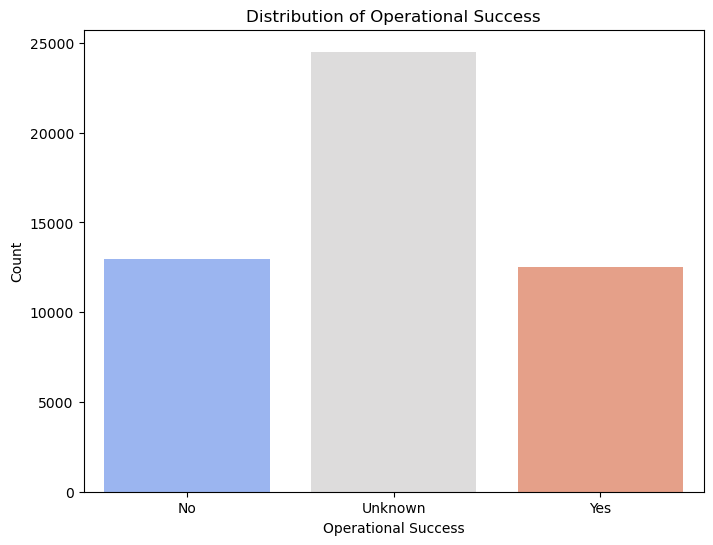

In [99]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=terror_attack, x='Operational_Success', palette='coolwarm')
plt.title('Distribution of Operational Success')
plt.xlabel('Operational Success')
plt.ylabel('Count')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for binary categories
plt.show()

<Figure size 1200x600 with 0 Axes>

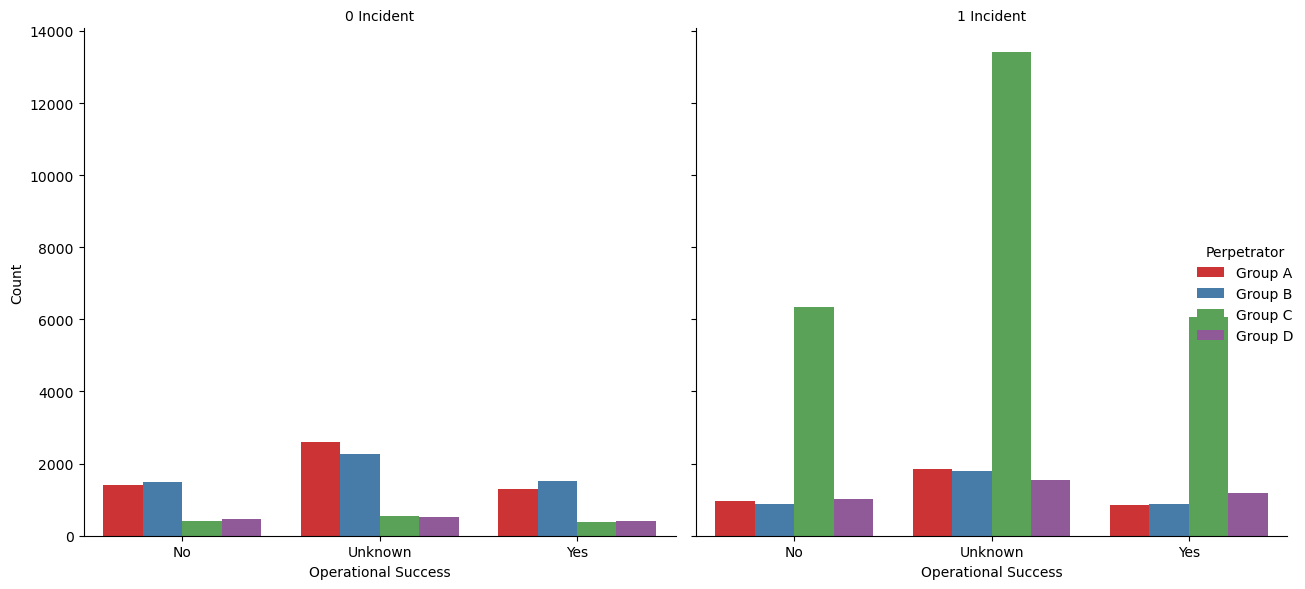

In [100]:
# Group the data by 'Operational_Success', 'Perpetrator', and 'Major_Incident', and count the number of incidents
grouped_data = terror_attack.groupby(['Operational_Success', 'Perpetrator', 'Major_Incident']).size().reset_index(name='Count')

# Create a grouped bar plot with stacked bars
plt.figure(figsize=(12, 6))
sns.set_palette('Set1')

g = sns.catplot(data=grouped_data, x='Operational_Success', y='Count', hue='Perpetrator', col='Major_Incident',
                kind='bar', height=6, aspect=1)

g.set_axis_labels('Operational Success', 'Count')
g.set_titles(col_template='{col_name} Incident')

# Get the current legend
legend = g._legend

# Customize legend labels
new_labels = {'0': 'Minor', '1': 'Major'}
for t in legend.texts:
    key = t.get_text()
    if key in new_labels:
        t.set_text(new_labels[key])

plt.tight_layout()
plt.show()

### Operatives Captured:

In [101]:
# Define the target column
target_column_operatives_captured = 'Operatives_Captured'

# Create a list of columns to test for association
columns_to_test = ['Day_of_Week', 'Location', 'Perpetrator', 'Target_Type', 'Motive', 'Claimed_By', 'Intelligence_Tip', 'Financial_Support', 'Training_Location', 'Communication_Method']

# Create a dictionary to store p-values for the Operatives_Captured column
p_values_operatives_captured = {}

# Perform chi-squared tests for each column with Operatives_Captured
for column in columns_to_test:
    p_operatives_captured = chi_squared_test(terror_attack, target_column_operatives_captured, column)
    p_values_operatives_captured[column] = p_operatives_captured

# Sort the dictionary by p-values
sorted_p_values_operatives_captured = {k: v for k, v in sorted(p_values_operatives_captured.items(), key=lambda item: item[1])}

# Print the sorted p-values for Operatives_Captured
print("Sorted p-values for Operatives_Captured:")
print(sorted_p_values_operatives_captured)

Sorted p-values for Operatives_Captured:
{'Location': 0.19949638562042094, 'Motive': 0.21149268840544314, 'Communication_Method': 0.28555554157905544, 'Training_Location': 0.29086977111926227, 'Target_Type': 0.3101107866956604, 'Intelligence_Tip': 0.4311410095617797, 'Financial_Support': 0.5012985839336392, 'Day_of_Week': 0.7652959095240821, 'Perpetrator': 0.7816497406396926, 'Claimed_By': 0.937277241572542}


In [102]:
terror_attack['Operatives_Captured'] = terror_attack.groupby('Perpetrator')['Operatives_Captured'].transform(lambda x: x.fillna(x.mean()))

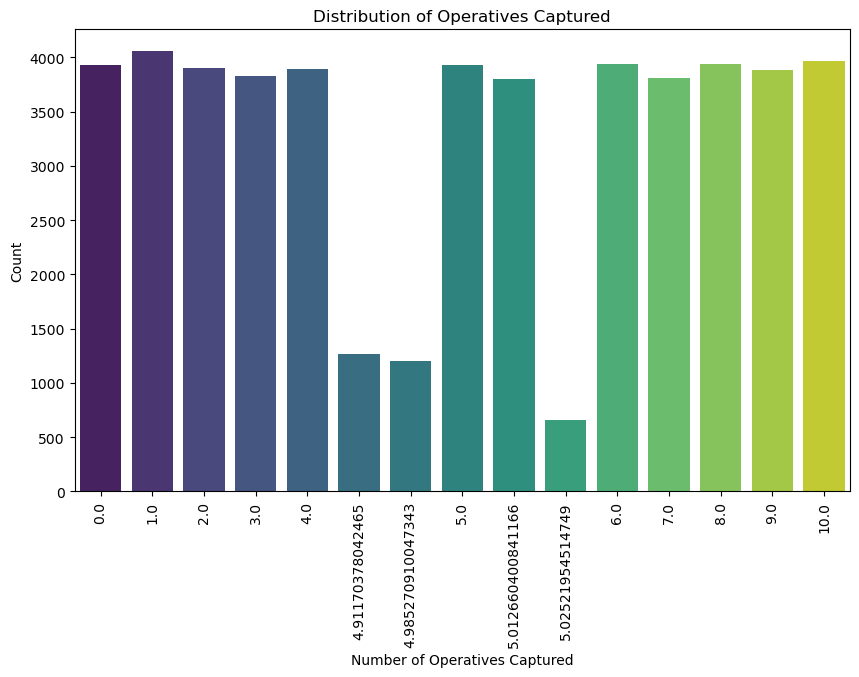

In [103]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Operatives_Captured', palette='viridis')
plt.title('Distribution of Operatives Captured')
plt.xlabel('Number of Operatives Captured')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

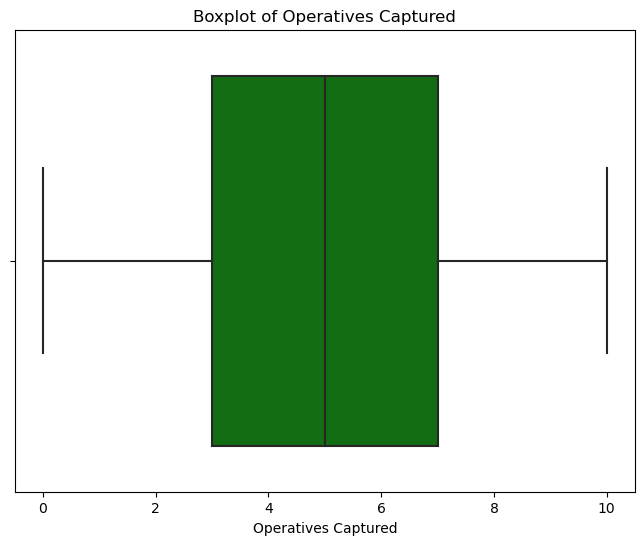

In [104]:
# Assuming you have a DataFrame named terror_attack
operatives_captured_column = terror_attack['Operatives_Captured']

# Create a boxplot for 'Operatives_Captured' using Seaborn with custom color
plt.figure(figsize=(8, 6))
sns.boxplot(x=operatives_captured_column, orient='h', color='green', saturation=0.7)
plt.title('Boxplot of Operatives Captured')
plt.xlabel('Operatives Captured')
plt.show()

### Financial Support:

In [105]:
terror_attack['Financial_Support'] = terror_attack['Financial_Support'].apply(lambda x: spell(x))

In [106]:
# Convert the values in the 'Financial_Support' column to lowercase
terror_attack['Financial_Support'] = terror_attack['Financial_Support'].str.lower()

# Define a mapping dictionary to standardize the weapon names
weapon_mapping = {
    'local':'Local','unknown':'Unknown', 'Internacional':'International', 'international':'International','total':'Local', 'vocal':'Local', 'loyal':'Local','Loyal':'Local', 'Total':'Local',
    'focal':'Local','internacional':'International'
}

# Apply the mapping using the replace method
terror_attack['Financial_Support'] = terror_attack['Financial_Support'].replace(weapon_mapping)

# Print the updated unique values in the 'Financial_Support' column
print(terror_attack['Financial_Support'].unique())

['Local' 'Unknown' 'International' nan]


In [107]:
# Define the columns for grouping and filling missing values
columns_to_group_by = ['Perpetrator']

# Grouping the data and filling the missing values with mode within each group:
for group, group_df in terror_attack.groupby(columns_to_group_by):
    mode_financial_support = group_df['Financial_Support'].mode().values[0]
    terror_attack.loc[group_df.index, 'Financial_Support'] = mode_financial_support

# The "Financial_Support" column should now have missing values filled with the mode of each relevant group.

# Print only the "Perpetrator" and "Financial_Support" columns
print(terror_attack[['Perpetrator', 'Financial_Support']])

      Perpetrator Financial_Support
0         Group C     International
1         Group A           Unknown
2         Group C     International
3         Group C     International
4         Group C     International
...           ...               ...
49995     Group B             Local
49996     Group B             Local
49997     Group B             Local
49998     Group C     International
49999     Group C     International

[50000 rows x 2 columns]


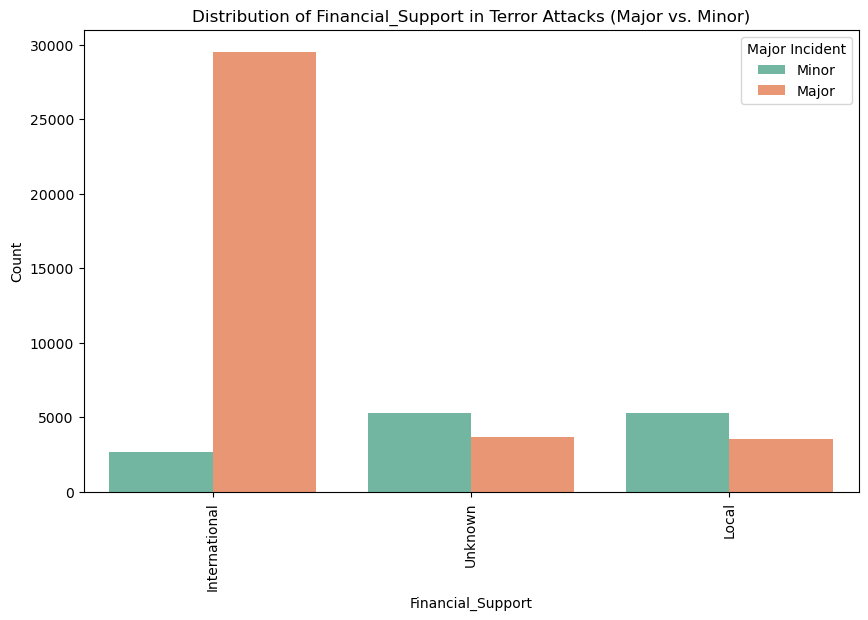

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=terror_attack, x='Financial_Support', hue='Major_Incident',
              order=terror_attack['Financial_Support'].value_counts().index, palette='Set2')
plt.xlabel('Financial_Support')
plt.ylabel('Count')
plt.title('Distribution of Financial_Support in Terror Attacks (Major vs. Minor)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Major Incident', labels=['Minor', 'Major'])
plt.show()

In [109]:
terror_attack.isnull().sum()

Date                       0
Day_of_Week                0
Location                   0
Attack_Type                0
Perpetrator                0
Known_Associates        6241
Victims_Injured            0
Victims_Deceased           0
Target_Type                0
Weapon_Used                0
Claimed_By                 0
Intelligence_Tip           0
Motive                     0
Operational_Success        0
Operatives_Captured        0
Financial_Support          0
Training_Location          0
Communication_Method       0
Major_Incident             0
country                    0
Year                       0
Casualties                 0
dtype: int64

### Known Associates:

In [110]:
print(terror_attack['Known_Associates'].head())

0    1.0
1    6.0
2    2.0
3    9.0
4    0.0
Name: Known_Associates, dtype: float64


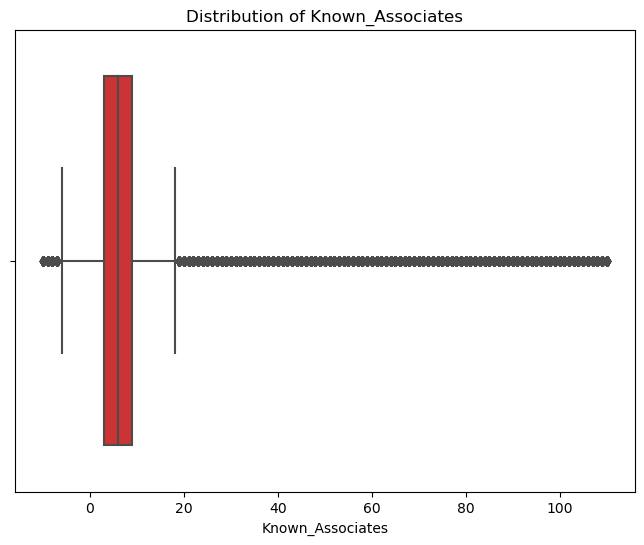

In [111]:
# Create a boxplot or histogram to visualize the data
plt.figure(figsize=(8, 6))
sns.boxplot(data=terror_attack, x='Known_Associates', orient='v')
# sns.histplot(data=terror_attack, x='Known_Associates', bins=20, kde=True)
plt.title('Distribution of Known_Associates')
plt.xlabel('Known_Associates')
plt.show()

In [112]:
# Extract'Known_Associates' column
known_associates_column = terror_attack['Known_Associates']

# Calculate IQR (Interquartile Range)
Q1 = known_associates_column.quantile(0.25)
Q3 = known_associates_column.quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outlier values with a specified threshold (e.g., lower_bound or upper_bound)
known_associates_column = np.where(known_associates_column < lower_bound, lower_bound, known_associates_column)
known_associates_column = np.where(known_associates_column > upper_bound, upper_bound, known_associates_column)

# Assign the modified 'Known_Associates' column back to the DataFrame
terror_attack['Known_Associates'] = known_associates_column

In [113]:
# Calculate the median of the 'Known_Associates' column
median_known_associates = terror_attack['Known_Associates'].median()

# Fill missing values in the 'Known_Associates' column with the calculated median
terror_attack['Known_Associates'].fillna(median_known_associates, inplace=True)

# Check for remaining missing values in 'Known_Associates' column
missing_known_associates = terror_attack[terror_attack['Known_Associates'].isna()]

# Check if there are any remaining missing values
print("Remaining missing values in 'Known_Associates' column:", len(missing_known_associates))

Remaining missing values in 'Known_Associates' column: 0


In [114]:
def replace_negative_with_zero(value):
    if value < 0:
        return 0
    else:
        return value

In [115]:
terror_attack['Known_Associates'] = terror_attack['Known_Associates'].apply(replace_negative_with_zero)

In [116]:
# Get unique values in the "Known_Associates" column
unique_known_associates = terror_attack['Known_Associates'].unique()

print("Unique Known Associates:")
print(unique_known_associates)

Unique Known Associates:
[ 1.  6.  2.  9.  0.  8.  7. 10. 18.  4.  3.  5. 15. 17. 12. 14. 13. 16.
 11.]


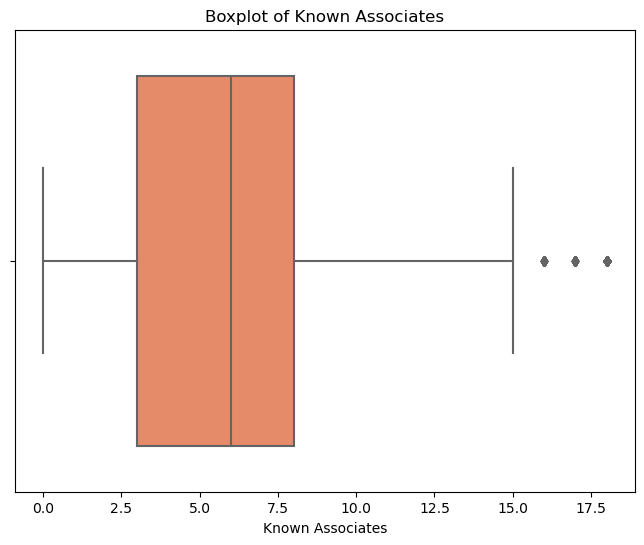

In [117]:
known_associates_column = terror_attack['Known_Associates']

plt.figure(figsize=(8, 6))
sns.boxplot(x=known_associates_column, orient='h', color='coral', saturation=0.7)
plt.title('Boxplot of Known Associates')
plt.xlabel('Known Associates')
plt.show()

### Perpetrator:

In [118]:
unique_perpetrators = terror_attack['Perpetrator'].unique()

print(unique_perpetrators)

['Group C', 'Group A', 'Group D', 'Group B']
Categories (4, object): ['Group A', 'Group B', 'Group C', 'Group D']


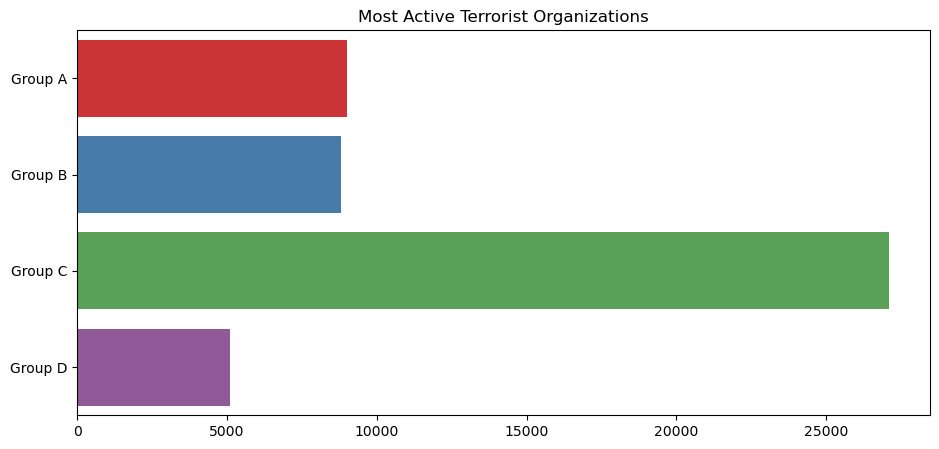

In [119]:
plt.subplots(figsize=(11, 5))
perpetrator_counts = terror_attack['Perpetrator'].value_counts()

# Include "Group C" and the top 11 values
sns.barplot(y=perpetrator_counts[0:12].index, x=perpetrator_counts[0:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

In [120]:
terror_attack.isnull().sum()

Date                    0
Day_of_Week             0
Location                0
Attack_Type             0
Perpetrator             0
Known_Associates        0
Victims_Injured         0
Victims_Deceased        0
Target_Type             0
Weapon_Used             0
Claimed_By              0
Intelligence_Tip        0
Motive                  0
Operational_Success     0
Operatives_Captured     0
Financial_Support       0
Training_Location       0
Communication_Method    0
Major_Incident          0
country                 0
Year                    0
Casualties              0
dtype: int64

In [121]:
terror_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  50000 non-null  datetime64[ns]
 1   Day_of_Week           50000 non-null  object        
 2   Location              50000 non-null  category      
 3   Attack_Type           50000 non-null  object        
 4   Perpetrator           50000 non-null  category      
 5   Known_Associates      50000 non-null  float64       
 6   Victims_Injured       50000 non-null  float64       
 7   Victims_Deceased      50000 non-null  float64       
 8   Target_Type           50000 non-null  object        
 9   Weapon_Used           50000 non-null  object        
 10  Claimed_By            50000 non-null  object        
 11  Intelligence_Tip      50000 non-null  object        
 12  Motive                50000 non-null  object        
 13  Operational_Succ

In [122]:
# Convert remaining categorical columns to 'category'
categorical_columns = ['Day_of_Week','Attack_Type','Target_Type', 'Weapon_Used', 'Claimed_By', 'Intelligence_Tip', 'Motive', 'Operational_Success', 'Financial_Support', 'Training_Location', 'Communication_Method']
terror_attack[categorical_columns] = terror_attack[categorical_columns].astype('category')


In [123]:
terror_attack.dtypes

Date                    datetime64[ns]
Day_of_Week                   category
Location                      category
Attack_Type                   category
Perpetrator                   category
Known_Associates               float64
Victims_Injured                float64
Victims_Deceased               float64
Target_Type                   category
Weapon_Used                   category
Claimed_By                    category
Intelligence_Tip              category
Motive                        category
Operational_Success           category
Operatives_Captured            float64
Financial_Support             category
Training_Location             category
Communication_Method          category
Major_Incident                   int64
country                       category
Year                             int64
Casualties                     float64
dtype: object

### Heatmap:

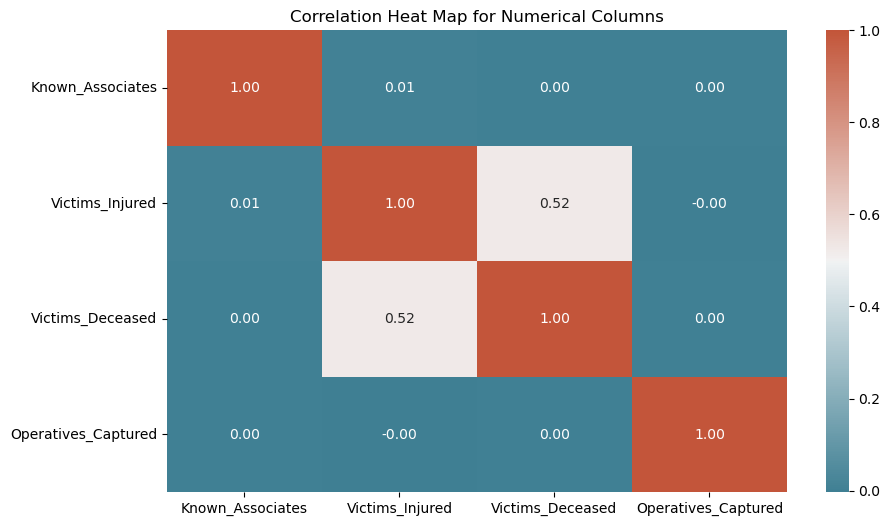

In [124]:
# Select numerical columns
numerical_columns = ["Known_Associates", "Victims_Injured", "Victims_Deceased", "Operatives_Captured"]

# Create a correlation matrix
correlation_matrix = terror_attack[numerical_columns].corr()

# Define a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap with custom colors
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation Heat Map for Numerical Columns")
plt.show()

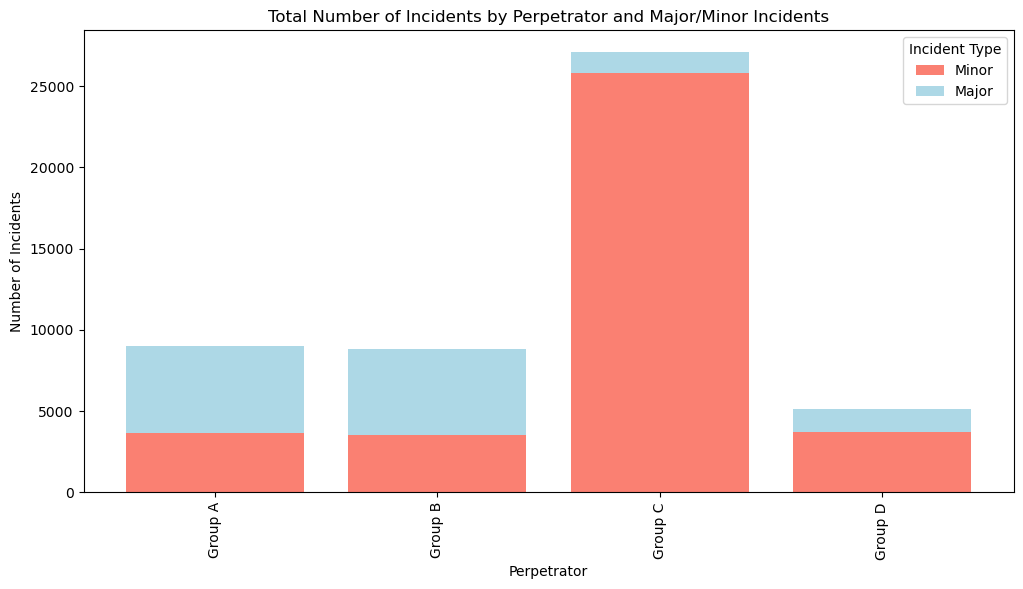

In [125]:
# Group the data by 'Perpetrator' and 'Major_Incident' and count the number of incidents
perpetrator_major_minor_counts = terror_attack.groupby(['Perpetrator', 'Major_Incident']).size().reset_index(name='Count')

# Create a bar plot to visualize the total number of incidents for each group
plt.figure(figsize=(12, 6))

# Define the colors for major and minor incidents
colors = {"Major": "salmon", "Minor": "lightblue"}

# Iterate through the Perpetrator groups and plot bars
x_labels = []
x_positions = []

for i, perp_group in enumerate(perpetrator_major_minor_counts['Perpetrator'].unique()):
    data = perpetrator_major_minor_counts[perpetrator_major_minor_counts['Perpetrator'] == perp_group]
    major_counts = data[data['Major_Incident'] == 1]['Count'].values[0]
    minor_counts = data[data['Major_Incident'] == 0]['Count'].values[0]

    x_labels.append(perp_group)
    x_positions.append(i)

    # Plot major incident counts
    plt.bar(i, major_counts, color=colors["Major"], label="Major" if i == 0 else "")

    # Plot minor incident counts
    plt.bar(i, minor_counts, bottom=major_counts, color=colors["Minor"], label="Minor" if i == 0 else "")

plt.xlabel('Perpetrator')
plt.ylabel('Number of Incidents')
plt.title('Total Number of Incidents by Perpetrator and Major/Minor Incidents')

# Set x-axis labels and positions
plt.xticks(x_positions, x_labels, rotation=90)

# Add a legend
plt.legend(title='Incident Type', labels=['Minor', 'Major'])

plt.show()

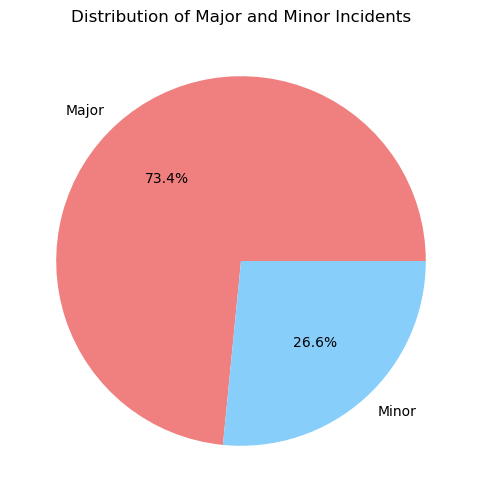

In [126]:
major_minor_counts = terror_attack['Major_Incident'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(major_minor_counts, labels=['Major', 'Minor'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Major and Minor Incidents')
plt.show()

In [127]:
terror_attack.dtypes

Date                    datetime64[ns]
Day_of_Week                   category
Location                      category
Attack_Type                   category
Perpetrator                   category
Known_Associates               float64
Victims_Injured                float64
Victims_Deceased               float64
Target_Type                   category
Weapon_Used                   category
Claimed_By                    category
Intelligence_Tip              category
Motive                        category
Operational_Success           category
Operatives_Captured            float64
Financial_Support             category
Training_Location             category
Communication_Method          category
Major_Incident                   int64
country                       category
Year                             int64
Casualties                     float64
dtype: object

### Saving and Loading the updated dataset:

In [128]:
# Save the cleaned data to a new CSV file
terror_attack.to_csv('cleaned_data.csv', index=False)

In [129]:
# Load the cleaned data for model building
cleaned_data = pd.read_csv('cleaned_data.csv')

### Feature Selection:

In [130]:
# List of columns to drop
columns_to_drop = ['Date', 'Day_of_Week', 'Location','Known_Associates','Claimed_By','Operatives_Captured','Operational_Success','Weapon_Used','Year','Casualties','Communication_Method'
                  ]   

# Drop the specified columns from the DataFrame
terror_attack = terror_attack.drop(columns=columns_to_drop)

### One Hot Encoding:

In [131]:
# List of categorical columns to one-hot encode
categorical_columns = ['Attack_Type', 'Perpetrator', 'Target_Type','Training_Location',
                       'Intelligence_Tip', 'Motive',
                       'Victims_Deceased', 'Financial_Support', 'Victims_Injured', 'country']

# Perform one-hot encoding on the specified categorical columns
encoded_df = pd.get_dummies(terror_attack, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame with one-hot encoded columns
print(encoded_df.head())

   Major_Incident  Attack_Type_Assassination  Attack_Type_Bombing  \
0               1                          0                    0   
1               1                          0                    1   
2               1                          0                    0   
3               1                          0                    1   
4               1                          0                    1   

   Attack_Type_Hijacking  Attack_Type_Kidnapping  Attack_Type_Other  \
0                      0                       0                  0   
1                      0                       0                  0   
2                      1                       0                  0   
3                      0                       0                  0   
4                      0                       0                  0   

   Attack_Type_Shooting  Attack_Type_Stabbing  Perpetrator_Group B  \
0                     1                     0                    0   
1                 

In [132]:
# Specify the file path where you want to save the CSV file
output_csv_path = 'encoded_dataset.csv'

# Save the DataFrame as a CSV file
encoded_df.to_csv(output_csv_path, index=False)

# Print a message to confirm that the CSV file has been saved
print(f'The encoded DataFrame has been saved to {output_csv_path}')

The encoded DataFrame has been saved to encoded_dataset.csv


In [133]:
#'encoded_df' is your DataFrame with one-hot encoded columns
column_names = encoded_df.columns

# Display the column names
print(column_names)

Index(['Major_Incident', 'Attack_Type_Assassination', 'Attack_Type_Bombing',
       'Attack_Type_Hijacking', 'Attack_Type_Kidnapping', 'Attack_Type_Other',
       'Attack_Type_Shooting', 'Attack_Type_Stabbing', 'Perpetrator_Group B',
       'Perpetrator_Group C',
       ...
       'country_Peru', 'country_Russia', 'country_South Africa',
       'country_South Korea', 'country_Spain', 'country_Thailand',
       'country_Turkey', 'country_UAE', 'country_UK', 'country_USA'],
      dtype='object', length=141)


In [134]:
X = encoded_df.drop('Major_Incident', axis=1)  # Features (all columns except 'Major_Incident')
y = encoded_df['Major_Incident']  # Target variable ('Major_Incident' column)

# Display the shapes of X and y 
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (50000, 140)
y shape: (50000,)


In [135]:
print(terror_attack.dtypes)

Attack_Type          category
Perpetrator          category
Victims_Injured       float64
Victims_Deceased      float64
Target_Type          category
Intelligence_Tip     category
Motive               category
Financial_Support    category
Training_Location    category
Major_Incident          int64
country              category
dtype: object


### Data Splitting:

In [136]:
from sklearn.model_selection import train_test_split
 
# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 140)
X_test shape: (10000, 140)
y_train shape: (40000,)
y_test shape: (10000,)


### Normalise Numerical Features:

In [137]:
## To normalize numerical features so that they contribute equally in prediction
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your feature matrix with numerical features
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform your test data
X_test_scaled = scaler.transform(X_test)

# Print the scaled training data
print("Scaled Training Data:\n", X_train_scaled)

# Print the scaled test data
print("Scaled Test Data:\n", X_test_scaled)

Scaled Training Data:
 [[-0.2252192  -0.85074463 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 ...
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
   4.89897949]
 [-0.2252192  -0.85074463 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192  -0.85074463 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]]
Scaled Test Data:
 [[-0.2252192  -0.85074463  3.63867325 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 ...
 [-0.2252192   1.17544086 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192  -0.85074463 -0.27482545 ... -0.20498642 -0.20198845
  -0.20412415]
 [-0.2252192  -0.85074463 -0.27482545 ... -0.20498642 -0

### Model Selection:

In [138]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [139]:
model.fit(X_train, y_train)

LogisticRegression()

Training Set Accuracy: 0.9976
Test Set Accuracy: 0.9957

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10695
           1       1.00      1.00      1.00     29305

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2584
           1       1.00      1.00      1.00      7416

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000


Confusion Matrix for Training Set:
 [[10631    64]
 [   32 29273]]
Confusion Matrix for Test Set:
 [[2559   25]
 [  18 7398]]

AUC-ROC Score for Test Set: 0.9998974844366294


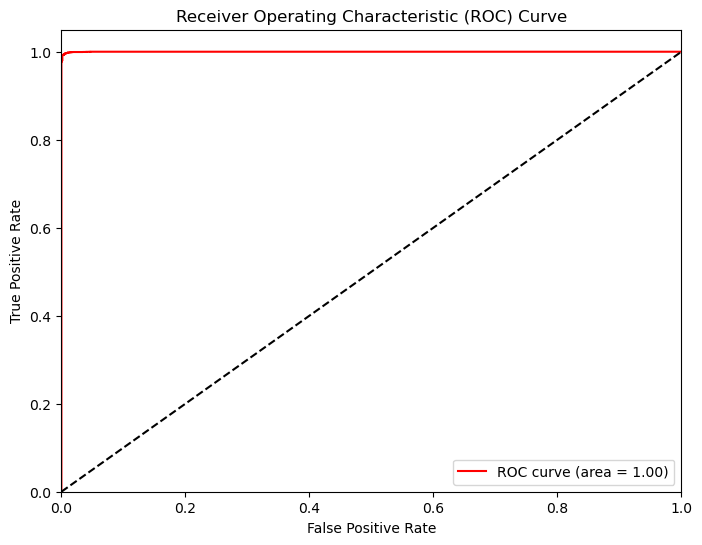

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

# Make predictions on the training set and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy on both datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification reports for both datasets
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Generate confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate AUC-ROC for test set
y_test_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print the results
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

print("\nClassification Report for Training Set:\n", train_classification_report)
print("Classification Report for Test Set:\n", test_classification_report)

print("\nConfusion Matrix for Training Set:\n", train_confusion_matrix)
print("Confusion Matrix for Test Set:\n", test_confusion_matrix)

print("\nAUC-ROC Score for Test Set:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

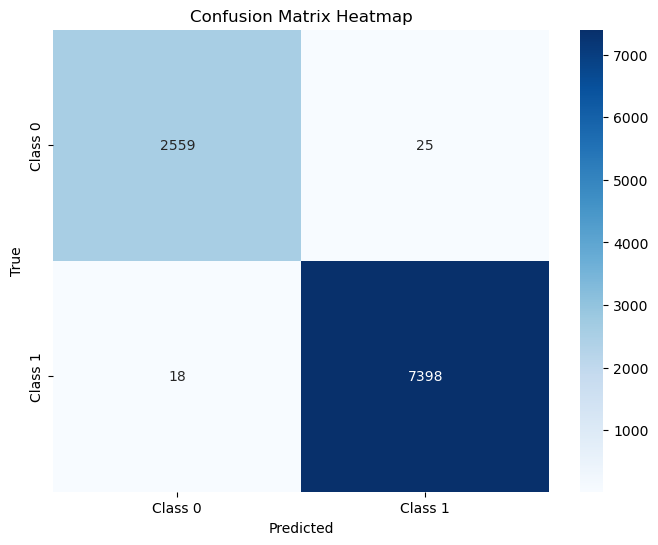

In [141]:
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_test' and 'y_test_pred' defined
confusion = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [142]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'sag'],  # Optimization algorithm
}

# Initialize GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test_scaled)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best Hyperparameters: {'C': 1, 'solver': 'lbfgs'}
Test Set Accuracy: 0.9965
Confusion Matrix:
 [[2574   10]
 [  25 7391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2584
           1       1.00      1.00      1.00      7416

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [143]:
from sklearn.model_selection import cross_val_score
 
# Create a Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=1, solver='lbfgs', random_state=42)

# Perform k-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(best_logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.99775  0.999    0.997625 0.997    0.99825 ]
Mean Cross-Validation Score: 0.9979249999999998
Standard Deviation of Cross-Validation Scores: 0.0006689544080129803


In [144]:
# Create a Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=1, solver='lbfgs', random_state=42)

# Fit the model to the scaled training data
best_logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, random_state=42)

### Naive bayes:

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('encoded_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Major_Incident'])  # Features
y = data['Major_Incident']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes Classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9945
Confusion Matrix:
[[2544   40]
 [  15 7401]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2584
           1       0.99      1.00      1.00      7416

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

Best Alpha: 0.1


In [147]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_cv)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.9966 0.9946 0.9961 0.9936 0.9947]


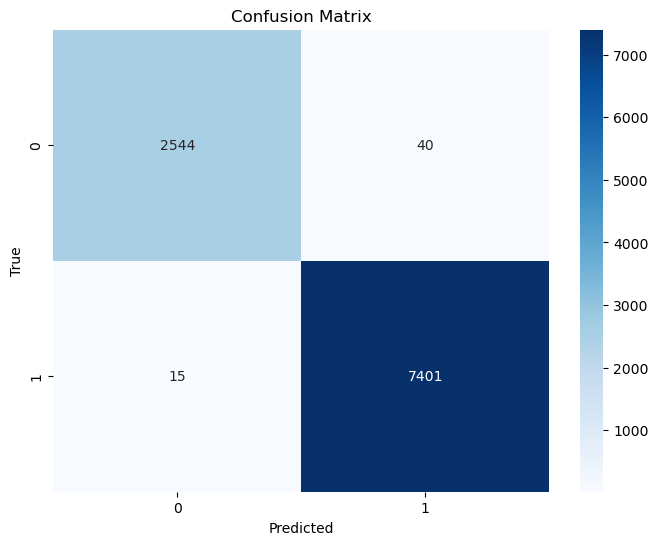

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2584
           1       0.99      1.00      1.00      7416

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



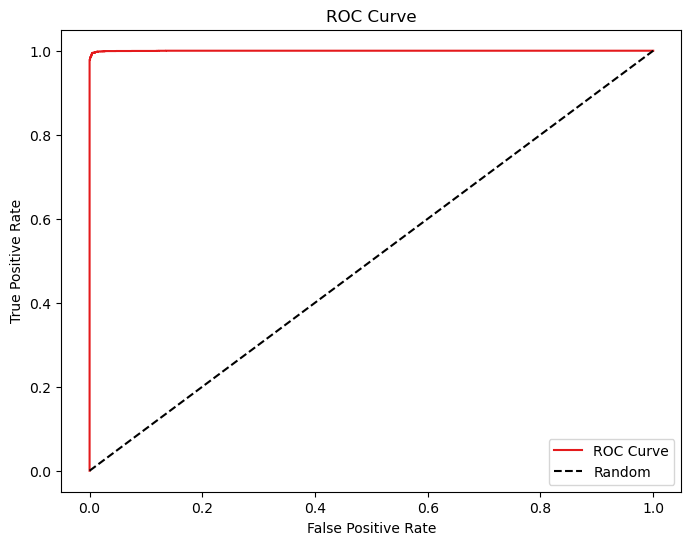

AUC: 0.9998151380080221


In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('encoded_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Major_Incident'])  # Features
y = data['Major_Incident']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes Classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# ROC Curve (only for binary classification)
from sklearn.metrics import roc_curve, roc_auc_score

if len(set(y_test)) == 2:  # Binary classification
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    auc = roc_auc_score(y_test, y_prob)
    print(f'AUC: {auc}')

### Random Forest:

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('encoded_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Major_Incident'])  # Features
y = data['Major_Incident']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9875
Confusion Matrix:
[[2528   56]
 [  69 7347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2584
           1       0.99      0.99      0.99      7416

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9878
Confusion Matrix:
[[2523   61]
 [  61 7355]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2584
           1       0.99      0.99      0.99      7416

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [151]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get scores
cv_scores = cross_val_score(model, X, y, cv=stratified_cv)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.9891 0.9873 0.9891 0.9858 0.9893]


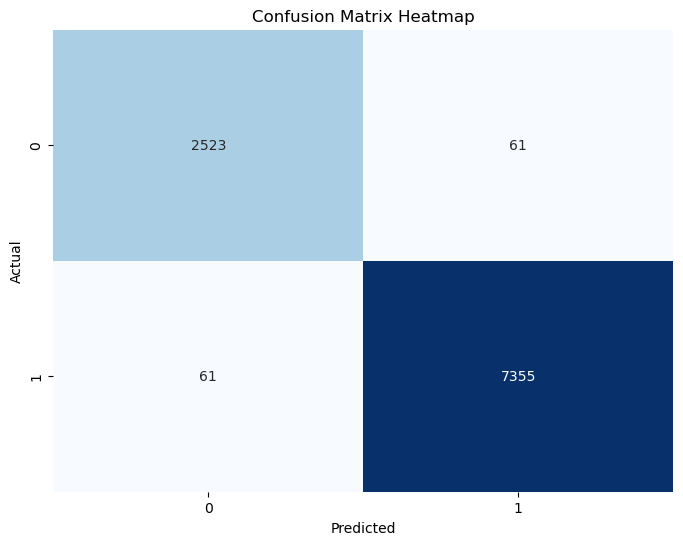

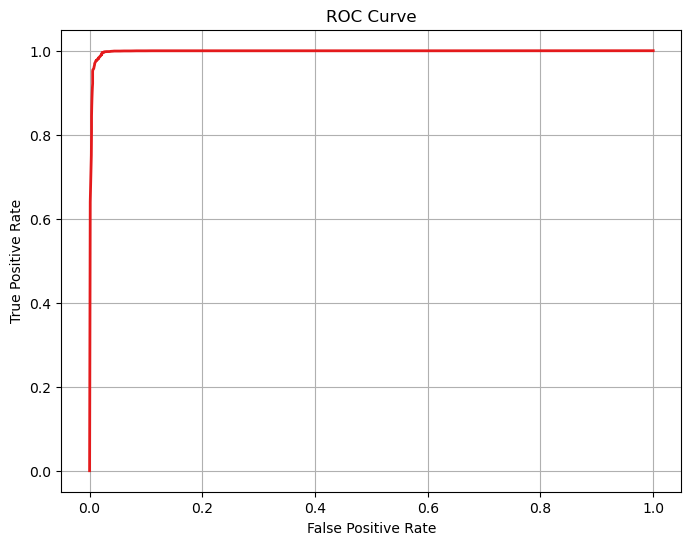

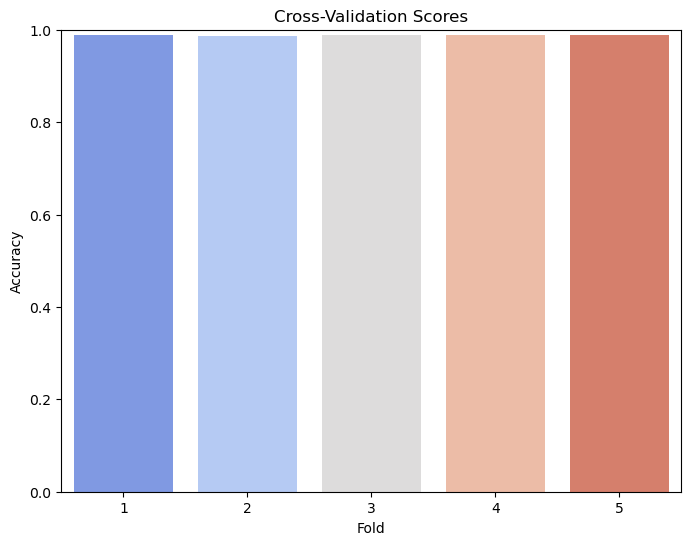

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize the Random Forest Classifier and fit it to your training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='-', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

# Cross-Validation Scores Bar Chart
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, 6)), y=cv_scores, palette='coolwarm')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)
plt.show()

### Decision Tree:

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your one-hot encoded dataset (replace 'encoded_dataset.csv' with your file)
data = pd.read_csv('encoded_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Major_Incident'])  # Features
y = data['Major_Incident']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9805
Confusion Matrix:
[[2523   61]
 [ 134 7282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2584
           1       0.99      0.98      0.99      7416

    accuracy                           0.98     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.98      0.98      0.98     10000



Best Max Depth: 20
Best Min Samples Split: 5
Cross-Validation Scores: [0.9906 0.9864 0.9895 0.9874 0.9896]
Accuracy: 0.9876
Confusion Matrix:
[[2518   66]
 [  58 7358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2584
           1       0.99      0.99      0.99      7416

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



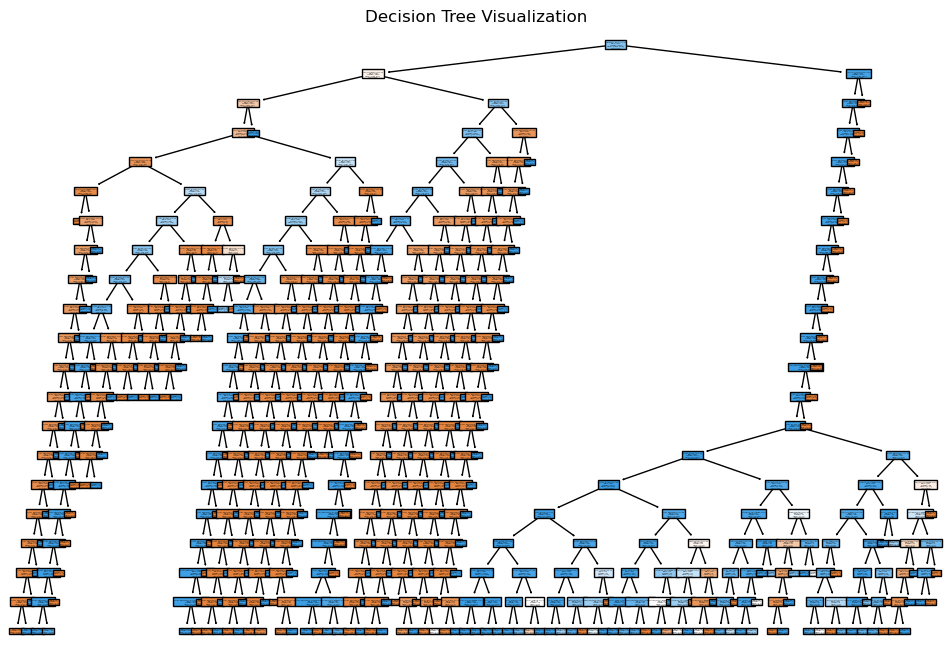

In [154]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('encoded_dataset.csv')

# Define the features (X) and target variable (y)
X = data.drop(columns=['Major_Incident'])   
y = data['Major_Incident']   

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Initialize a Decision Tree Classifier with the best hyperparameters
best_decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

# Cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_decision_tree_model, X, y, cv=stratified_cv)

# Train the model on the training data
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Best Max Depth: {best_max_depth}')
print(f'Best Min Samples Split: {best_min_samples_split}')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_decision_tree_model, filled=True, feature_names=X.columns, class_names=['Minor', 'Major'])
plt.title('Decision Tree Visualization')
plt.show()

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc)
import matplotlib.pyplot as plt

# Load your dataset and preprocess it
data = pd.read_csv('encoded_dataset.csv')
X = data.drop(columns=['Major_Incident'])
y = data['Major_Incident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Create a DataFrame to store model performance metrics
model_metrics = []

# Loop through models, train, evaluate, and store metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Store metrics in the DataFrame
    model_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Precision (0)': class_report['0']['precision'],
        'Recall (0)': class_report['0']['recall'],
        'F1-Score (0)': class_report['0']['f1-score'],
        'Precision (1)': class_report['1']['precision'],
        'Recall (1)': class_report['1']['recall'],
        'F1-Score (1)': class_report['1']['f1-score'],
    })

# Display the model performance metrics in a styled table
metrics_df = pd.DataFrame(model_metrics)
metrics_df.style.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'lightgray')]
}]).hide_index()

Model,Accuracy,Precision,Recall,F1-Score,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
Random Forest,0.987500,0.992435,0.990696,0.991565,0.973431,0.978328,0.975873,0.992435,0.990696,0.991565
Naive Bayes,0.994500,0.994624,0.997977,0.996298,0.994138,0.984520,0.989306,0.994624,0.997977,0.996298
Decision Tree,0.980500,0.991693,0.981931,0.986788,0.949567,0.976393,0.962793,0.991693,0.981931,0.986788
Logistic Regression,0.995700,0.996632,0.997573,0.997102,0.993015,0.990325,0.991668,0.996632,0.997573,0.997102


In [157]:
import pickle

# Save the best Logistic Regression model to a file using pickle
with open('best_logistic_model.pkl', 'wb') as model_file:
    pickle.dump(best_logistic_model, model_file)

In [158]:
# Load the model from the file
with open('best_logistic_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [160]:
loaded_model.predict(X_test_scaled) 

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [161]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [162]:
import streamlit as st
import pickle   
import pandas as pd

with open('best_logistic_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Create a Streamlit web app
st.title('Terrorism Prediction App')

# Create input widgets for numerical features
known_associates = st.slider('Known Associates', min_value=0, max_value=10, value=5)
victims_injured = st.slider('Victims Injured', min_value=0, max_value=100, value=50)
victims_deceased = st.slider('Victims Deceased', min_value=0, max_value=100, value=25)
operatives_captured = st.slider('Operatives Captured', min_value=0, max_value=10, value=2)

# Create dropdown menus for categorical features
attack_type = st.selectbox('Attack Type', ['Shooting','Bombing','Hijacking','Arson','Stabbing','Kidnapping',
 'Assassination','Other'])
perpetrator = st.selectbox('Perpetrator', ['Group A', 'Group B', 'Group C', 'Group D'])
target_type = st.selectbox('Target Type', ['civilians','tourists','infrastructure','police',
 'government officials'])
training_location = st.selectbox('Training Location', ['Domestic', 'Abroad'])
intelligence_tip = st.selectbox('Intelligence Tip', ['Yes', 'No', 'Unknown'])
motive = st.selectbox('Motive', ['Political','Religious','Ethnic','Unknown','Retaliation'])
financial_support = st.selectbox('Financial Support', ['Local', 'International', 'Unknown'])
country = st.selectbox('Country', ['Turkey', 'Australia', 'Canada', 'Argentina', 'Brazil', 'China', 'Egypt', 'France', 'Paris', 'Germany', 'Greece', 'India', 'Indonesia', 'Italy', 'Japan', 'Kenya', 'Mexico', 'Peru', 'Russia', 'South Africa', 'South Korea', 'Spain', 'Thailand', 'UAE', 'UK', 'USA'])

# Create a button to make predictions
if st.button('Predict'):
    # Map categorical feature selections to one-hot encoded columns
    attack_type_encoded = {
        'Bombing': 1 if attack_type == 'Bombing' else 0,
        'Shooting': 1 if attack_type == 'Shooting' else 0,
        'Hijacking': 1 if attack_type == 'Hijacking' else 0,
        'Arson': 1 if attack_type == 'Arson' else 0,
        'Stabbing': 1 if attack_type == 'Stabbing' else 0,
        'Kidnapping': 1 if attack_type == 'Kidnapping' else 0,
        'Assassination': 1 if attack_type == 'Assassination' else 0,
        'Other': 1 if attack_type == 'Other' else 0
    }
    
    perpetrator_encoded = {
        'Group A': 1 if perpetrator == 'Group A' else 0,
        'Group B': 1 if perpetrator == 'Group B' else 0,
        'Group C': 1 if perpetrator == 'Group C' else 0,
        'Group D': 1 if perpetrator == 'Group D' else 0,
    }
                                   
    target_type_encoded = {
        'civilians': 1 if target_type == 'civilians' else 0,
        'tourists': 1 if target_type == 'tourists' else 0,
        'infrastructure': 1 if target_type == 'infrastructure' else 0,
        'police': 1 if target_type == 'police' else 0,
        'government officials': 1 if target_type == 'government officials' else 0,
    }
    
    training_location_encoded = {
        'Domestic': 1 if training_location == 'Domestic' else 0,
        'Abroad': 1 if training_location == 'Abroad' else 0,
    }
                                   
    intelligence_tip_encoded = {
        'Yes': 1 if intelligence_tip == 'Yes' else 0,
        'No': 1 if intelligence_tip == 'No' else 0,
        'Unknown': 1 if intelligence_tip == 'Unknown' else 0,
    }    
                                   
    motive_encoded = {
        'Political': 1 if motive == 'Political' else 0,
        'Religious': 1 if motive == 'Religious' else 0,
        'Ethnic': 1 if motive == 'Ethnic' else 0,
        'Unknown': 1 if motive == 'Unknown' else 0,
        'Retaliation': 1 if motive == 'Retaliation' else 0,
    }
                                   
    financial_support_encoded = {
        'Local': 1 if financial_support == 'Local' else 0,
        'International': 1 if financial_support == 'International' else 0,
        'Unknown': 1 if financial_support == 'Unknown' else 0,
    }
                                   
    country_encoded = {
    'Turkey': 1 if country == 'Turkey' else 0,
    'Australia': 1 if country == 'Australia' else 0,
    'Canada': 1 if country == 'Canada' else 0,
    'Argentina': 1 if country == 'Argentina' else 0,
    'Brazil': 1 if country == 'Brazil' else 0,
    'China': 1 if country == 'China' else 0,
    'Egypt': 1 if country == 'Egypt' else 0,
    'France': 1 if country == 'France' else 0,
    'Paris': 1 if country == 'Paris' else 0,
    'Germany': 1 if country == 'Germany' else 0,
    'Greece': 1 if country == 'Greece' else 0,
    'India': 1 if country == 'India' else 0,
    'Indonesia': 1 if country == 'Indonesia' else 0,
    'Italy': 1 if country == 'Italy' else 0,
    'Japan': 1 if country == 'Japan' else 0,
    'Kenya': 1 if country == 'Kenya' else 0,
    'Mexico': 1 if country == 'Mexico' else 0,
    'Peru': 1 if country == 'Peru' else 0,
    'Russia': 1 if country == 'Russia' else 0,
    'South Africa': 1 if country == 'South Africa' else 0,
    'South Korea': 1 if country == 'South Korea' else 0,
    'Spain': 1 if country == 'Spain' else 0,
    'Thailand': 1 if country == 'Thailand' else 0,
    'UAE': 1 if country == 'UAE' else 0,
    'UK': 1 if country == 'UK' else 0,
    'USA': 1 if country == 'USA' else 0,
    }                           
 
    # Use the loaded model to make predictions
    prediction = loaded_model.predict(pd.DataFrame({
        'Known_Associates': [known_associates],
        'Victims_Injured': [victims_injured],
        'Victims_Deceased': [victims_deceased],
        'Operatives_Captured': [operatives_captured],
        **attack_type_encoded,
        **perpetrator_encoded,
        **target_type_encoded,
        **training_location_encoded,
        **intelligence_tip_encoded,
        **motive_encoded,
        **financial_support_encoded,
        **country_encoded,
    }))

    # Display the prediction
    if prediction[0] == 1:
        st.write('The model predicts a major incident.')
    else:
        st.write('The model predicts a minor incident.')

2023-09-25 16:26:48.332 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
